## load light curve and all preprocess...

In [10]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os,sys, gc, time

dirpath = os.getcwd().split("code")[0]+"code/"
sys.path.append(dirpath)
from pre_process import clean_LC,generate_representation
from evaluation import calculate_metrics, evaluate_metadata, evaluate_metadata_raw

folder = "../../KOI_Data/"
folder_lc = "/work/work_teamEXOPLANET/KOI_LC/"

def impute_on_pandas(df):
    return df.fillna(df.median(),inplace=False)
df_meta = pd.read_csv(folder+"/kepler_dataset.csv")
all_labels = df_meta["NExScI Disposition"]
mask_conf = (all_labels=="CONFIRMED").values
mask_fp = (all_labels=="FALSE POSITIVE").values
mask_cand = (all_labels=="CANDIDATE").values

metadata_used = ["Period", "Duration", "Time of Transit Epoch",
                 "Inclination", "Semi-major Axis", "r/R",
                 "Teq", "Transit Number", "Limb Darkening Coeff1", "Limb Darkening Coeff2"]
df_meta_obj = df_meta[metadata_used]
df_meta_obj["Duration"] = df_meta_obj["Duration"]/24
mask_nan = pd.isna(df_meta_obj)

df_meta_obj = impute_on_pandas(df_meta_obj)

df_meta_obj.head()

/users/fmena/anaconda3/envs/tesis/lib/python3.5/site-packages/ipykernel/__main__.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Period,Duration,Time of Transit Epoch,Inclination,Semi-major Axis,r/R,Teq,Transit Number,Limb Darkening Coeff1,Limb Darkening Coeff2
0,8.884923,0.086252,169.991686,89.89,0.079,0.114,770.0,153,0.497,0.204
1,5.092465,0.152458,357.535940,89.14,0.052,0.014,844.0,225,0.551,0.165
2,275.073650,0.140417,315.248600,89.93,0.789,0.014,303.0,4,0.437,0.243
3,8.460439,0.197288,133.774490,85.68,0.075,0.478,804.0,164,0.299,0.306
4,21.761298,0.051792,166.540438,89.95,0.140,0.032,486.0,62,0.627,0.108


In [11]:
df_sets = pd.read_csv(folder+"/koi_sets_unb.csv") 
mask_train = (df_sets["Set"] == "Train").values
mask_test = (df_sets["Set"] == "Test").values

mask_train_conf = mask_conf & mask_train
mask_test_conf = mask_conf & mask_test

Y_train = df_meta_obj.values[mask_train_conf]
Y_test = df_meta_obj.values[mask_test_conf]
Y_test.shape

(505, 10)

In [12]:
time_kepler = np.load(folder_lc+"npy/KOI_LC_time.npy")
process_lc = np.load(folder_lc+'/cleaned/LC_kepler_processed.npy')

### mascara para solo confirmados???
time_kepler = time_kepler[mask_test_conf]
process_lc = process_lc[mask_test_conf]
N, T = time_kepler.shape
print((N,T))

for i in range(N):
    time_kepler[i], process_lc[i] = generate_representation(time_kepler[i], process_lc[i])
    
coupled_lc = []
coupled_time = []
for i in range(N):
    mask_nan_aux = np.isnan(process_lc[i])
    coupled_lc.append(process_lc[i][~mask_nan_aux])    
    coupled_time.append(time_kepler[i][~mask_nan_aux])
X_lc_test = np.asarray(coupled_lc)
X_time_test = np.asarray(coupled_time)

##without scale it
X_lc_test.shape

(505, 71427)
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423941 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423942 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423942 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423942 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampl

***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is b

New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old le

New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423953 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423953 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423952 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423952 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423952 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************M

(505,)

In [13]:
from astropy.timeseries import BoxLeastSquares, LombScargle
from gatspy.periodic import LombScargle as LombScargleGAT
from gatspy.periodic import LombScargleFast
from scipy.signal import lombscargle
i = 1

In [5]:
model = LombScargleFast().fit(X_time_test[i], X_lc_test[i])

period, power = model.periodogram_auto(nyquist_factor=200)

print("period range: ({0}, {1})".format(period.min(), period.max()))
print("number of periods: {0}".format(len(period)))
print("precision needed: ",(period.max()-period.min())/len(period))

period range: (0.0002265586799558547, 7297.341802038101)
number of periods: 32209500
precision needed:  0.00022655867292194605


### Using training set

Minimum period:  0.34184201700000005
Maximum period:  1071.232624
Mean period:  26.770957654357545


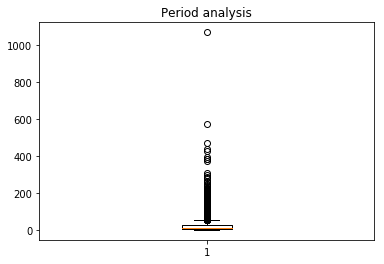

Minimum duration:  0.017829166666666667
Maximum duration:  1.0175
Mean duration:  0.17825431752064563


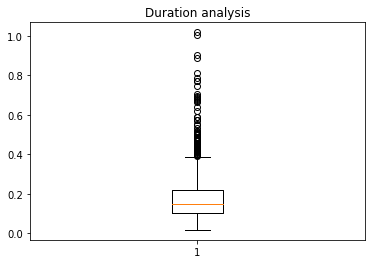

In [14]:
period_train = Y_train[:,0]

print("Minimum period: ",period_train.min())
print("Maximum period: ",period_train.max())
print("Mean period: ",period_train.mean())

plt.boxplot(period_train)
plt.title("Period analysis")
plt.show()

duration_train = Y_train[:,1]

print("Minimum duration: ",duration_train.min())
print("Maximum duration: ",duration_train.max())
print("Mean duration: ",duration_train.mean())

plt.boxplot(duration_train)
plt.title("Duration analysis")
plt.show()

In [47]:
# Choose a period grid
precision_needed = 1e-2 #ya es suficientemente pequeño 1e-3
periods = np.arange(0.01, 2000, precision_needed )

ang_freqs = 2 * np.pi / periods
freqs = 1 / periods

print("Cantidad de valores a explorar: ",ang_freqs.shape[0])
periods

Cantidad de valores a explorar:  199999


array([1.00000e-02, 2.00000e-02, 3.00000e-02, ..., 1.99997e+03,
       1.99998e+03, 1.99999e+03])

### Lomb-Scargle method

In [14]:
%%time
periodogram = lombscargle(X_time_test[i], X_lc_test[i], ang_freqs, normalize=False)#input has to be centered..
periodogram

CPU times: user 15min 6s, sys: 1.75 s, total: 15min 8s
Wall time: 15min 4s


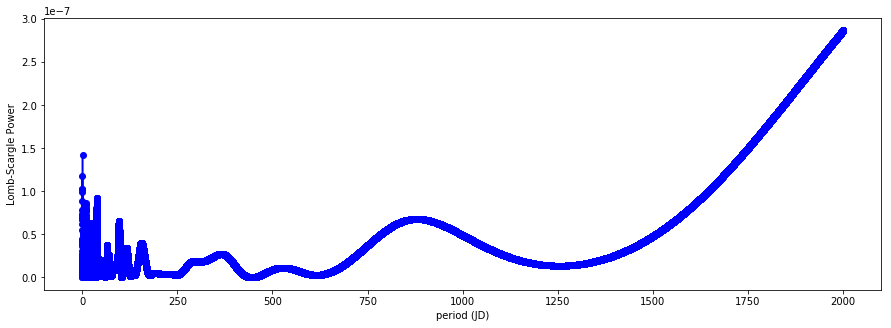

Max power Period:  1999.99
Second Max power Period:  1999.98


In [20]:
plt.figure(figsize=(15,5))
plt.plot(periods, periodogram, 'bo-')
plt.xlabel('period (JD)')
plt.ylabel('Lomb-Scargle Power')
plt.show()

indx_max = periodogram.argsort()[::-1]
print("Max power Period: ",periods[indx_max[0]])
print("Second Max power Period: ",periods[indx_max[1]]) ##misma escala

In [9]:
%%time
model = LombScargleGAT(fit_offset=True, center_data=False).fit(X_time_test[i], X_lc_test[i])
periodogram = model.score(periods)

CPU times: user 1min 29s, sys: 1.72 s, total: 1min 31s
Wall time: 1min 28s


In [ ]:
plt.figure(figsize=(15,5))
plt.plot(periods, periodogram, 'bo-')
plt.xlabel('period (JD)')
plt.ylabel('Lomb-Scargle Power')
plt.show()

indx_max = periodogram.argsort()[::-1]
print("Max power Period: ",periods[indx_max[0]])
print("Second Max power Period: ",periods[indx_max[1]])

In [8]:
%%time
model = LombScargle(X_time_test[i], X_lc_test[i], center_data=False)
periodogram = model.power(freqs,method='chi2') #cython

CPU times: user 20min 42s, sys: 1.6 s, total: 20min 43s
Wall time: 20min 41s


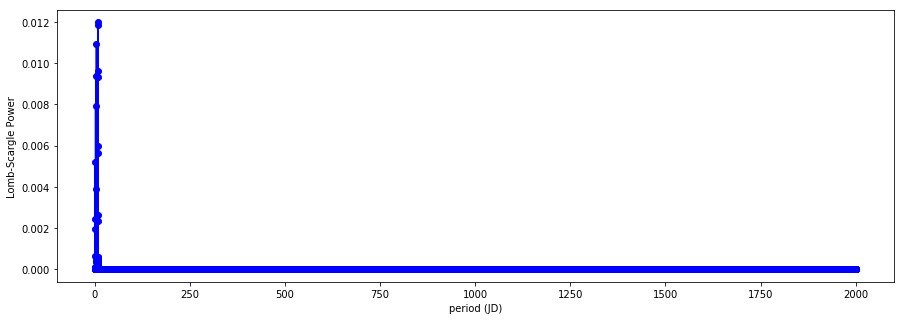

Max power Period:  8.89
Second Max power Period:  8.88


In [9]:
plt.figure(figsize=(15,5))
plt.plot(periods, periodogram, 'bo-')
plt.xlabel('period (JD)')
plt.ylabel('Lomb-Scargle Power')
plt.show()

indx_max = periodogram.argsort()[::-1]
print("Max power Period: ",periods[indx_max[0]])
print("Second Max power Period: ",periods[indx_max[1]])

In [9]:
%%time
model = LombScargle(X_time_test[i], X_lc_test[i], center_data=False, fit_mean=True)
freqs_t, periodogram = model.autopower(method='fast'
#freqs_t, periodogram = model.autopower(method='fast')

periods_t = 1/freqs_t
periods_t #fast o fastchi2

CPU times: user 1.89 s, sys: 2.31 s, total: 4.2 s
Wall time: 1.64 s


In [13]:
periods_t[indx_max[0]]*2*np.pi

0.06516725629527399

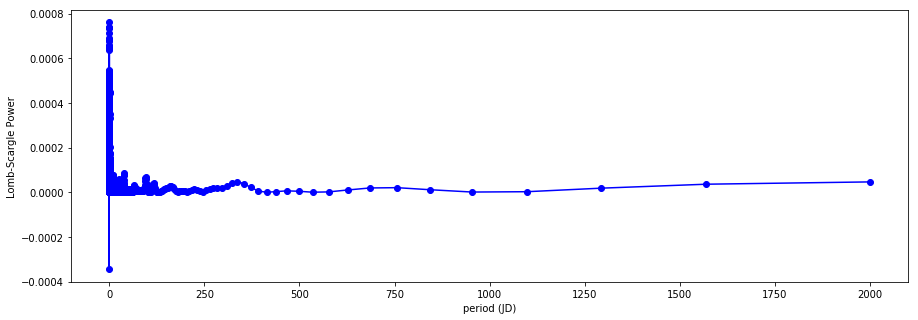

Max power Period:  0.010557426050840044
Second Max power Period:  0.01919415419727856


In [10]:
plt.figure(figsize=(15,5))
plt.plot(periods_t, periodogram, 'bo-')
plt.xlabel('period (JD)')
plt.ylabel('Lomb-Scargle Power')
plt.show()

indx_max = periodogram.argsort()[::-1]
print("Max power Period: ",periods_t[indx_max[0]])
print("Second Max power Period: ",periods_t[indx_max[1]])

In [11]:
# Choose a period grid
precision_needed = 1e-3 #ya es suficientemente pequeño 1e-3
freqs = np.arange(1/2000, 1/1e-1, precision_needed )

periods = 1 / freqs

print("Cantidad de valores a explorar: ",freqs.shape[0])

Cantidad de valores a explorar:  10000


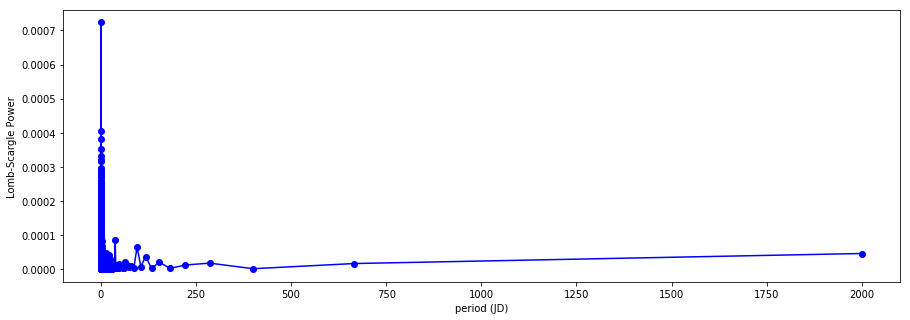

Max power Period:  0.31650577623041615
Second Max power Period:  0.43525571273122954


In [12]:
model = LombScargle(X_time_test[i], X_lc_test[i], center_data=False)
periodogram = model.power(freqs,method='fast') #cython
plt.figure(figsize=(15,5))
plt.plot(periods, periodogram, 'bo-')
plt.xlabel('period (JD)')
plt.ylabel('Lomb-Scargle Power')
plt.show()

indx_max = periodogram.argsort()[::-1]
print("Max power Period: ",periods[indx_max[0]])
print("Second Max power Period: ",periods[indx_max[1]])

##### CON GATSpY

In [13]:
%%time
model = LombScargleFast(center_data=True, fit_offset=True)
model.fit(X_time_test[i], X_lc_test[i])

periodogram = model.score_frequency_grid(f0=freqs.min(), df=precision_needed, N=freqs.shape[0])

CPU times: user 1.39 s, sys: 2.17 s, total: 3.56 s
Wall time: 838 ms


In [14]:
%%time
model = LombScargleFast(center_data=True, fit_offset=True)
model.fit(X_time_test[i], X_lc_test[i])
#ls.optimizer.period_range = (0.2, 1.2)

periods, periodogram = model.periodogram_auto(nyquist_factor=5)

CPU times: user 2.96 s, sys: 2.26 s, total: 5.21 s
Wall time: 2.84 s


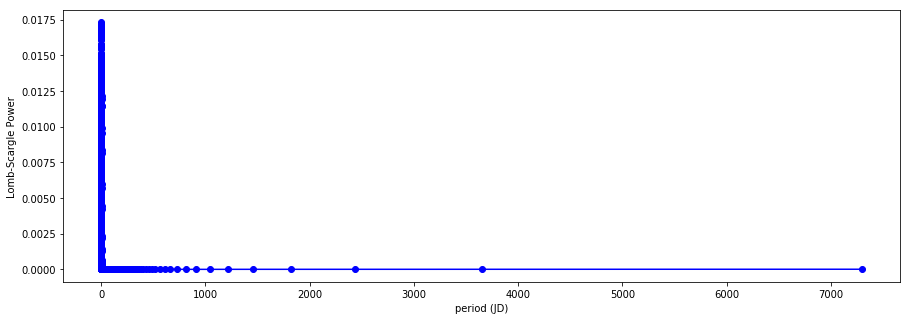

Max power Period:  0.009998207616529224
Second Max power Period:  0.010444843022719514


In [15]:
plt.figure(figsize=(15,5))
plt.plot(periods, periodogram, 'bo-')
plt.xlabel('period (JD)')
plt.ylabel('Lomb-Scargle Power')
plt.show()

indx_max = periodogram.argsort()[::-1]
print("Max power Period: ",periods[indx_max[0]])
print("Second Max power Period: ",periods[indx_max[1]])

### BoxLeastSquares

In [ ]:
%%time
model = BoxLeastSquares(X_time_test[i], X_lc_test[i])
dur_BLS = np.arange(periods.min()/100, periods.min()*10, precision_needed)
print(dur_BLS.shape)
results = model.power(periods, duration=dur_BLS) #que es duration????--duracion de transito

transit_time = results.transit_time
depth = results.depth
duration = results.duration
periodogram = results.power

In [50]:
dur_BLS = np.arange(0.01, 1.25, precision_needed)
dur_BLS

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  , 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09, 1.1 ,
       1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2 , 1.21,
       1.22, 1.23, 1.24])

In [51]:
%%time
model = BoxLeastSquares(X_time_test[i], X_lc_test[i])
results = model.power(periods, duration=dur_BLS) #que es duration????--duracion de transito

transit_time = results.transit_time
depth = results.depth
duration = results.duration
periodogram = results.power

ValueError: The maximum transit duration must be shorter than the minimum period

In [24]:
dur_BLS = np.arange(0.001, 0.05, precision_needed)
print(dur_BLS.shape)

(5,)


In [ ]:
#dur_BLS = np.arange(periods.min()/100, periods.max()/10, precision_needed)
#dur_BLS = np.arange(0.002, 0.05, precision_needed)
dur_BLS = np.arange(0.01, 1.25, precision_needed)
print(dur_BLS.shape)

model = BoxLeastSquares(X_time_test[i], X_lc_test[i])
results = model.autopower(dur_BLS, frequency_factor=10.0) #default es 1

periodogram = results.power
periods = results.period

transit_time = results.transit_time
depth = results.depth
duration = results.duration

(124,)


In [ ]:
plt.figure(figsize=(15,5))
plt.plot(periods, periodogram, 'bo-')
plt.xlabel('period (JD)')
plt.ylabel('Lomb-Scargle Power')
plt.show()

indx_max = periodogram.argsort()[::-1]
print("Max power Period: ",periods[indx_max[0]])
print("Second Max power Period: ",periods[indx_max[1]])

### https://transitleastsquares.readthedocs.io/

In [21]:
from transitleastsquares import transitleastsquares as TLS
TLS_mod = TLS(X_time_test[i], X_lc_test[i]+1 )
results = TLS_mod.power(period_min=periods.min(), period_max=periods.max(), show_progress_bar=True)


Transit Least Squares TLS 1.0.23 (12 March 2019)
Creating model cache for 26 durations








  0%|          | 0/93081 periods | 00:00<?

Searching 64419 data points, 93081 periods from 1.0 to 10.0 days
Using all 24 CPU threads








  0%|          | 1/93081 periods | 00:05<141:11:05





  0%|          | 2/93081 periods | 00:05<99:40:41 





  0%|          | 3/93081 periods | 00:05<70:41:02





  0%|          | 6/93081 periods | 00:05<49:47:35





  0%|          | 9/93081 periods | 00:05<35:07:02





  0%|          | 17/93081 periods | 00:06<24:40:45





  0%|          | 22/93081 periods | 00:06<17:25:55





  0%|          | 31/93081 periods | 00:06<12:17:19





  0%|          | 41/93081 periods | 00:06<8:42:34 





  0%|          | 47/93081 periods | 00:06<6:13:35





  0%|          | 53/93081 periods | 00:06<4:29:14





  0%|          | 60/93081 periods | 00:06<3:17:35





  0%|          | 66/93081 periods | 00:06<2:30:49





  0%|          | 72/93081 periods | 00:06<1:53:58





  0%|          | 78/93081 periods | 00:07<1:30:03





  0%|          | 84/93081 periods | 00:07<1:11:07





  0%|          | 90/93081 periods | 00:07<1:03:20





  0%|          | 95/93081 periods | 00:07<53:49  





  1%|▏         | 1354/93081 periods | 00:34<34:23





  1%|▏         | 1360/93081 periods | 00:34<33:43





  1%|▏         | 1366/93081 periods | 00:34<34:07





  1%|▏         | 1373/93081 periods | 00:34<30:48





  1%|▏         | 1379/93081 periods | 00:34<30:48





  1%|▏         | 1385/93081 periods | 00:34<31:45





  1%|▏         | 1391/93081 periods | 00:34<31:17





  2%|▏         | 1397/93081 periods | 00:34<30:09





  2%|▏         | 1403/93081 periods | 00:35<35:08





  2%|▏         | 1408/93081 periods | 00:35<34:21





  2%|▏         | 1414/93081 periods | 00:35<32:34





  2%|▏         | 1419/93081 periods | 00:35<35:37





  2%|▏         | 1425/93081 periods | 00:35<34:34





  2%|▏         | 1431/93081 periods | 00:35<32:56





  2%|▏         | 1436/93081 periods | 00:35<36:02





  2%|▏         | 1442/93081 periods | 00:35<33:09





  2%|▏         | 1447/93081 periods | 00:36<32:59





  2%|▏         | 1453/93081 periods | 00:36<31:37





  2%|▏    

  3%|▎         | 2669/93081 periods | 01:02<39:46





  3%|▎         | 2675/93081 periods | 01:02<37:08





  3%|▎         | 2681/93081 periods | 01:02<33:43





  3%|▎         | 2687/93081 periods | 01:02<36:57





  3%|▎         | 2692/93081 periods | 01:02<37:52





  3%|▎         | 2697/93081 periods | 01:02<43:59





  3%|▎         | 2701/93081 periods | 01:03<42:10





  3%|▎         | 2705/93081 periods | 01:03<48:07





  3%|▎         | 2712/93081 periods | 01:03<40:38





  3%|▎         | 2718/93081 periods | 01:03<40:27





  3%|▎         | 2725/93081 periods | 01:03<35:40





  3%|▎         | 2731/93081 periods | 01:03<34:39





  3%|▎         | 2737/93081 periods | 01:03<32:59





  3%|▎         | 2743/93081 periods | 01:03<31:56





  3%|▎         | 2748/93081 periods | 01:04<32:37





  3%|▎         | 2753/93081 periods | 01:04<41:19





  3%|▎         | 2760/93081 periods | 01:04<37:17





  3%|▎         | 2766/93081 periods | 01:04<34:37





  3%|▎    

  4%|▍         | 4010/93081 periods | 01:31<40:11





  4%|▍         | 4014/93081 periods | 01:31<41:59





  4%|▍         | 4020/93081 periods | 01:31<36:52





  4%|▍         | 4025/93081 periods | 01:31<44:04





  4%|▍         | 4029/93081 periods | 01:32<44:20





  4%|▍         | 4038/93081 periods | 01:32<36:38





  4%|▍         | 4043/93081 periods | 01:32<35:28





  4%|▍         | 4048/93081 periods | 01:32<34:40





  4%|▍         | 4053/93081 periods | 01:32<36:31





  4%|▍         | 4059/93081 periods | 01:32<33:03





  4%|▍         | 4064/93081 periods | 01:32<35:30





  4%|▍         | 4069/93081 periods | 01:32<39:58





  4%|▍         | 4074/93081 periods | 01:33<42:30





  4%|▍         | 4078/93081 periods | 01:33<46:41





  4%|▍         | 4082/93081 periods | 01:33<46:38





  4%|▍         | 4086/93081 periods | 01:33<47:42





  4%|▍         | 4090/93081 periods | 01:33<50:13





  4%|▍         | 4094/93081 periods | 01:33<49:36





  4%|▍    

  6%|▌         | 5243/93081 periods | 02:01<31:05





  6%|▌         | 5250/93081 periods | 02:01<31:31





  6%|▌         | 5255/93081 periods | 02:01<30:54





  6%|▌         | 5260/93081 periods | 02:02<31:15





  6%|▌         | 5265/93081 periods | 02:02<30:40





  6%|▌         | 5270/93081 periods | 02:02<31:09





  6%|▌         | 5277/93081 periods | 02:02<31:48





  6%|▌         | 5283/93081 periods | 02:02<30:00





  6%|▌         | 5288/93081 periods | 02:02<30:33





  6%|▌         | 5294/93081 periods | 02:02<33:49





  6%|▌         | 5299/93081 periods | 02:02<33:56





  6%|▌         | 5306/93081 periods | 02:03<31:34





  6%|▌         | 5312/93081 periods | 02:03<31:44





  6%|▌         | 5320/93081 periods | 02:03<29:55





  6%|▌         | 5325/93081 periods | 02:03<30:09





  6%|▌         | 5330/93081 periods | 02:03<33:00





  6%|▌         | 5336/93081 periods | 02:03<32:32





  6%|▌         | 5341/93081 periods | 02:03<33:23





  6%|▌    

  7%|▋         | 6477/93081 periods | 02:27<32:21





  7%|▋         | 6482/93081 periods | 02:27<37:15





  7%|▋         | 6489/93081 periods | 02:27<34:36





  7%|▋         | 6494/93081 periods | 02:27<32:57





  7%|▋         | 6503/93081 periods | 02:28<29:04





  7%|▋         | 6509/93081 periods | 02:28<29:36





  7%|▋         | 6515/93081 periods | 02:28<30:54





  7%|▋         | 6521/93081 periods | 02:28<28:55





  7%|▋         | 6527/93081 periods | 02:28<36:24





  7%|▋         | 6534/93081 periods | 02:28<37:21





  7%|▋         | 6539/93081 periods | 02:28<39:27





  7%|▋         | 6547/93081 periods | 02:29<34:07





  7%|▋         | 6553/93081 periods | 02:29<32:17





  7%|▋         | 6558/93081 periods | 02:29<32:19





  7%|▋         | 6563/93081 periods | 02:29<33:07





  7%|▋         | 6571/93081 periods | 02:29<30:53





  7%|▋         | 6578/93081 periods | 02:29<29:39





  7%|▋         | 6584/93081 periods | 02:29<30:23





  7%|▋    

  8%|▊         | 7648/93081 periods | 02:54<42:48





  8%|▊         | 7654/93081 periods | 02:54<39:42





  8%|▊         | 7661/93081 periods | 02:54<36:22





  8%|▊         | 7666/93081 periods | 02:54<37:09





  8%|▊         | 7671/93081 periods | 02:54<37:52





  8%|▊         | 7677/93081 periods | 02:55<38:04





  8%|▊         | 7685/93081 periods | 02:55<34:36





  8%|▊         | 7690/93081 periods | 02:55<38:36





  8%|▊         | 7695/93081 periods | 02:55<36:14





  8%|▊         | 7704/93081 periods | 02:55<33:55





  8%|▊         | 7709/93081 periods | 02:55<32:50





  8%|▊         | 7714/93081 periods | 02:55<34:38





  8%|▊         | 7719/93081 periods | 02:55<34:08





  8%|▊         | 7726/93081 periods | 02:56<34:33





  8%|▊         | 7731/93081 periods | 02:56<41:02





  8%|▊         | 7739/93081 periods | 02:56<37:37





  8%|▊         | 7745/93081 periods | 02:56<37:37





  8%|▊         | 7751/93081 periods | 02:56<33:56





  8%|▊    

 10%|▉         | 8860/93081 periods | 03:25<36:54





 10%|▉         | 8864/93081 periods | 03:25<36:53





 10%|▉         | 8868/93081 periods | 03:26<40:13





 10%|▉         | 8875/93081 periods | 03:26<37:26





 10%|▉         | 8881/93081 periods | 03:26<33:52





 10%|▉         | 8886/93081 periods | 03:26<37:56





 10%|▉         | 8890/93081 periods | 03:26<37:28





 10%|▉         | 8894/93081 periods | 03:26<41:02





 10%|▉         | 8902/93081 periods | 03:26<36:22





 10%|▉         | 8907/93081 periods | 03:27<40:38





 10%|▉         | 8911/93081 periods | 03:27<40:57





 10%|▉         | 8915/93081 periods | 03:27<40:32





 10%|▉         | 8920/93081 periods | 03:27<40:31





 10%|▉         | 8924/93081 periods | 03:27<38:55





 10%|▉         | 8930/93081 periods | 03:27<36:54





 10%|▉         | 8936/93081 periods | 03:27<34:30





 10%|▉         | 8941/93081 periods | 03:27<33:45





 10%|▉         | 8947/93081 periods | 03:28<32:39











 10%

 11%|█         | 10017/93081 periods | 03:56<38:12





 11%|█         | 10021/93081 periods | 03:56<37:28





 11%|█         | 10025/93081 periods | 03:56<36:40





 11%|█         | 10033/93081 periods | 03:56<31:02





 11%|█         | 10039/93081 periods | 03:57<32:03





 11%|█         | 10044/93081 periods | 03:57<33:06





 11%|█         | 10049/93081 periods | 03:57<36:22





 11%|█         | 10054/93081 periods | 03:57<34:09





 11%|█         | 10059/93081 periods | 03:57<35:14





 11%|█         | 10064/93081 periods | 03:57<35:47





 11%|█         | 10069/93081 periods | 03:57<37:16





 11%|█         | 10074/93081 periods | 03:58<38:45





 11%|█         | 10078/93081 periods | 03:58<40:40





 11%|█         | 10083/93081 periods | 03:58<40:54





 11%|█         | 10091/93081 periods | 03:58<34:46





 11%|█         | 10096/93081 periods | 03:58<36:59





 11%|█         | 10101/93081 periods | 03:58<40:46





 11%|█         | 10106/93081 periods | 03:58<37:

 12%|█▏        | 11146/93081 periods | 04:27<36:09





 12%|█▏        | 11152/93081 periods | 04:27<32:17





 12%|█▏        | 11157/93081 periods | 04:27<32:13





 12%|█▏        | 11163/93081 periods | 04:27<32:05





 12%|█▏        | 11168/93081 periods | 04:27<31:34





 12%|█▏        | 11174/93081 periods | 04:27<29:55





 12%|█▏        | 11180/93081 periods | 04:27<30:42





 12%|█▏        | 11185/93081 periods | 04:28<32:08





 12%|█▏        | 11190/93081 periods | 04:28<30:49





 12%|█▏        | 11195/93081 periods | 04:28<33:46





 12%|█▏        | 11200/93081 periods | 04:28<35:02





 12%|█▏        | 11209/93081 periods | 04:28<29:51





 12%|█▏        | 11215/93081 periods | 04:28<30:19





 12%|█▏        | 11220/93081 periods | 04:28<36:26





 12%|█▏        | 11226/93081 periods | 04:29<32:25





 12%|█▏        | 11232/93081 periods | 04:29<35:38





 12%|█▏        | 11239/93081 periods | 04:29<33:31





 12%|█▏        | 11244/93081 periods | 04:29<36:

 13%|█▎        | 12305/93081 periods | 04:57<36:49





 13%|█▎        | 12310/93081 periods | 04:57<37:16





 13%|█▎        | 12314/93081 periods | 04:57<41:48





 13%|█▎        | 12318/93081 periods | 04:57<45:26





 13%|█▎        | 12323/93081 periods | 04:58<43:19





 13%|█▎        | 12330/93081 periods | 04:58<39:35





 13%|█▎        | 12334/93081 periods | 04:58<43:38





 13%|█▎        | 12341/93081 periods | 04:58<39:14





 13%|█▎        | 12345/93081 periods | 04:58<39:16





 13%|█▎        | 12349/93081 periods | 04:58<42:49





 13%|█▎        | 12355/93081 periods | 04:59<46:36





 13%|█▎        | 12362/93081 periods | 04:59<38:56





 13%|█▎        | 12367/93081 periods | 04:59<41:42





 13%|█▎        | 12371/93081 periods | 04:59<41:36





 13%|█▎        | 12375/93081 periods | 04:59<42:23





 13%|█▎        | 12382/93081 periods | 04:59<36:13





 13%|█▎        | 12387/93081 periods | 04:59<39:24





 13%|█▎        | 12391/93081 periods | 05:00<40:

 14%|█▍        | 13460/93081 periods | 05:28<36:50





 14%|█▍        | 13465/93081 periods | 05:28<35:03





 14%|█▍        | 13470/93081 periods | 05:28<33:38





 14%|█▍        | 13475/93081 periods | 05:28<35:50





 14%|█▍        | 13479/93081 periods | 05:28<35:49





 14%|█▍        | 13483/93081 periods | 05:29<41:08





 14%|█▍        | 13489/93081 periods | 05:29<38:23





 14%|█▍        | 13493/93081 periods | 05:29<37:37





 15%|█▍        | 13499/93081 periods | 05:29<37:34





 15%|█▍        | 13503/93081 periods | 05:29<38:33





 15%|█▍        | 13507/93081 periods | 05:29<40:58





 15%|█▍        | 13512/93081 periods | 05:29<40:09





 15%|█▍        | 13516/93081 periods | 05:29<38:08





 15%|█▍        | 13522/93081 periods | 05:30<38:15





 15%|█▍        | 13526/93081 periods | 05:30<37:20





 15%|█▍        | 13530/93081 periods | 05:30<38:51





 15%|█▍        | 13537/93081 periods | 05:30<35:14





 15%|█▍        | 13541/93081 periods | 05:30<41:

 16%|█▌        | 14570/93081 periods | 05:58<40:06





 16%|█▌        | 14574/93081 periods | 05:58<39:44





 16%|█▌        | 14578/93081 periods | 05:58<41:33





 16%|█▌        | 14582/93081 periods | 05:58<41:00





 16%|█▌        | 14588/93081 periods | 05:59<37:12





 16%|█▌        | 14595/93081 periods | 05:59<33:14





 16%|█▌        | 14600/93081 periods | 05:59<35:31





 16%|█▌        | 14604/93081 periods | 05:59<35:02





 16%|█▌        | 14611/93081 periods | 05:59<35:09





 16%|█▌        | 14615/93081 periods | 05:59<36:12





 16%|█▌        | 14622/93081 periods | 05:59<33:43





 16%|█▌        | 14626/93081 periods | 06:00<41:49











 16%|█▌        | 14631/93081 periods | 06:00<40:12





 16%|█▌        | 14637/93081 periods | 06:00<34:50





 16%|█▌        | 14642/93081 periods | 06:00<37:16





 16%|█▌        | 14649/93081 periods | 06:00<38:16





 16%|█▌        | 14654/93081 periods | 06:00<34:53





 16%|█▌        | 14659/93081 periods | 06:

 17%|█▋        | 15747/93081 periods | 06:29<42:02





 17%|█▋        | 15752/93081 periods | 06:29<40:56





 17%|█▋        | 15756/93081 periods | 06:29<45:18





 17%|█▋        | 15760/93081 periods | 06:29<44:30





 17%|█▋        | 15765/93081 periods | 06:29<43:51





 17%|█▋        | 15769/93081 periods | 06:30<40:53





 17%|█▋        | 15776/93081 periods | 06:30<42:55





 17%|█▋        | 15782/93081 periods | 06:30<38:26





 17%|█▋        | 15786/93081 periods | 06:30<37:08





 17%|█▋        | 15791/93081 periods | 06:30<37:57





 17%|█▋        | 15797/93081 periods | 06:30<34:00





 17%|█▋        | 15802/93081 periods | 06:30<35:42





 17%|█▋        | 15810/93081 periods | 06:31<32:20





 17%|█▋        | 15816/93081 periods | 06:31<34:29





 17%|█▋        | 15822/93081 periods | 06:31<30:44





 17%|█▋        | 15827/93081 periods | 06:31<35:52





 17%|█▋        | 15833/93081 periods | 06:31<34:00





 17%|█▋        | 15838/93081 periods | 06:31<36:

 18%|█▊        | 16898/93081 periods | 06:59<33:33





 18%|█▊        | 16903/93081 periods | 06:59<31:35





 18%|█▊        | 16912/93081 periods | 06:59<29:47





 18%|█▊        | 16918/93081 periods | 07:00<31:13





 18%|█▊        | 16923/93081 periods | 07:00<30:49





 18%|█▊        | 16928/93081 periods | 07:00<33:47





 18%|█▊        | 16932/93081 periods | 07:00<34:43





 18%|█▊        | 16938/93081 periods | 07:00<34:38





 18%|█▊        | 16942/93081 periods | 07:00<36:03





 18%|█▊        | 16946/93081 periods | 07:00<36:26





 18%|█▊        | 16951/93081 periods | 07:01<35:40





 18%|█▊        | 16955/93081 periods | 07:01<39:06





 18%|█▊        | 16959/93081 periods | 07:01<43:17





 18%|█▊        | 16963/93081 periods | 07:01<39:49





 18%|█▊        | 16967/93081 periods | 07:01<40:03





 18%|█▊        | 16971/93081 periods | 07:01<38:57





 18%|█▊        | 16977/93081 periods | 07:01<35:01





 18%|█▊        | 16981/93081 periods | 07:02<37:

 19%|█▉        | 18002/93081 periods | 07:30<34:52





 19%|█▉        | 18006/93081 periods | 07:30<36:06





 19%|█▉        | 18012/93081 periods | 07:30<34:15





 19%|█▉        | 18016/93081 periods | 07:30<38:12





 19%|█▉        | 18022/93081 periods | 07:31<37:43





 19%|█▉        | 18026/93081 periods | 07:31<38:07





 19%|█▉        | 18033/93081 periods | 07:31<36:53





 19%|█▉        | 18037/93081 periods | 07:31<37:11





 19%|█▉        | 18041/93081 periods | 07:31<35:52





 19%|█▉        | 18047/93081 periods | 07:31<32:25





 19%|█▉        | 18052/93081 periods | 07:31<31:36





 19%|█▉        | 18057/93081 periods | 07:31<30:35





 19%|█▉        | 18062/93081 periods | 07:32<33:14





 19%|█▉        | 18066/93081 periods | 07:32<34:15





 19%|█▉        | 18072/93081 periods | 07:32<33:07











 19%|█▉        | 18079/93081 periods | 07:32<29:27





 19%|█▉        | 18084/93081 periods | 07:32<33:45





 19%|█▉        | 18088/93081 periods | 07:

 21%|██        | 19148/93081 periods | 08:00<35:22





 21%|██        | 19152/93081 periods | 08:00<35:52





 21%|██        | 19156/93081 periods | 08:00<39:41





 21%|██        | 19160/93081 periods | 08:00<48:03





 21%|██        | 19163/93081 periods | 08:01<55:56





 21%|██        | 19170/93081 periods | 08:01<47:46





 21%|██        | 19174/93081 periods | 08:01<49:44





 21%|██        | 19179/93081 periods | 08:01<46:40





 21%|██        | 19184/93081 periods | 08:01<40:46





 21%|██        | 19188/93081 periods | 08:01<40:20





 21%|██        | 19193/93081 periods | 08:02<40:17





 21%|██        | 19198/93081 periods | 08:02<36:25





 21%|██        | 19202/93081 periods | 08:02<35:44





 21%|██        | 19206/93081 periods | 08:02<35:16





 21%|██        | 19210/93081 periods | 08:02<35:40





 21%|██        | 19214/93081 periods | 08:02<37:09





 21%|██        | 19218/93081 periods | 08:02<39:13





 21%|██        | 19225/93081 periods | 08:02<34:

 22%|██▏       | 20272/93081 periods | 08:30<36:18





 22%|██▏       | 20276/93081 periods | 08:30<37:12





 22%|██▏       | 20281/93081 periods | 08:30<33:23





 22%|██▏       | 20287/93081 periods | 08:30<30:13





 22%|██▏       | 20292/93081 periods | 08:31<30:05





 22%|██▏       | 20297/93081 periods | 08:31<32:11





 22%|██▏       | 20301/93081 periods | 08:31<31:38





 22%|██▏       | 20306/93081 periods | 08:31<34:59





 22%|██▏       | 20311/93081 periods | 08:31<38:50





 22%|██▏       | 20317/93081 periods | 08:31<33:17





 22%|██▏       | 20324/93081 periods | 08:31<31:16





 22%|██▏       | 20329/93081 periods | 08:32<29:46





 22%|██▏       | 20334/93081 periods | 08:32<30:33





 22%|██▏       | 20339/93081 periods | 08:32<37:36





 22%|██▏       | 20346/93081 periods | 08:32<32:32





 22%|██▏       | 20351/93081 periods | 08:32<36:14





 22%|██▏       | 20356/93081 periods | 08:32<34:15





 22%|██▏       | 20361/93081 periods | 08:32<32:

 23%|██▎       | 21388/93081 periods | 09:00<33:21





 23%|██▎       | 21397/93081 periods | 09:00<28:09





 23%|██▎       | 21402/93081 periods | 09:00<33:24





 23%|██▎       | 21407/93081 periods | 09:00<34:31





 23%|██▎       | 21413/93081 periods | 09:01<31:10





 23%|██▎       | 21418/93081 periods | 09:01<30:18





 23%|██▎       | 21423/93081 periods | 09:01<33:56





 23%|██▎       | 21428/93081 periods | 09:01<35:33





 23%|██▎       | 21432/93081 periods | 09:01<36:50





 23%|██▎       | 21436/93081 periods | 09:01<35:29





 23%|██▎       | 21440/93081 periods | 09:01<40:53





 23%|██▎       | 21445/93081 periods | 09:02<36:14





 23%|██▎       | 21449/93081 periods | 09:02<36:00





 23%|██▎       | 21454/93081 periods | 09:02<36:22





 23%|██▎       | 21459/93081 periods | 09:02<34:21





 23%|██▎       | 21463/93081 periods | 09:02<33:56





 23%|██▎       | 21467/93081 periods | 09:02<36:46





 23%|██▎       | 21471/93081 periods | 09:02<36:

 24%|██▍       | 22514/93081 periods | 09:30<33:24





 24%|██▍       | 22519/93081 periods | 09:30<32:45





 24%|██▍       | 22523/93081 periods | 09:30<33:19





 24%|██▍       | 22529/93081 periods | 09:30<32:08





 24%|██▍       | 22534/93081 periods | 09:31<38:13





 24%|██▍       | 22542/93081 periods | 09:31<34:14





 24%|██▍       | 22546/93081 periods | 09:31<33:26





 24%|██▍       | 22553/93081 periods | 09:31<31:13





 24%|██▍       | 22557/93081 periods | 09:31<33:17





 24%|██▍       | 22562/93081 periods | 09:31<30:29





 24%|██▍       | 22567/93081 periods | 09:31<31:05





 24%|██▍       | 22571/93081 periods | 09:32<31:46





 24%|██▍       | 22576/93081 periods | 09:32<29:18





 24%|██▍       | 22581/93081 periods | 09:32<28:42





 24%|██▍       | 22587/93081 periods | 09:32<29:36





 24%|██▍       | 22593/93081 periods | 09:32<29:28





 24%|██▍       | 22598/93081 periods | 09:32<28:10





 24%|██▍       | 22603/93081 periods | 09:32<31:

 25%|██▌       | 23651/93081 periods | 10:01<32:47





 25%|██▌       | 23655/93081 periods | 10:01<33:35





 25%|██▌       | 23662/93081 periods | 10:01<30:51





 25%|██▌       | 23667/93081 periods | 10:01<34:48





 25%|██▌       | 23671/93081 periods | 10:01<34:12





 25%|██▌       | 23675/93081 periods | 10:02<37:08





 25%|██▌       | 23681/93081 periods | 10:02<33:27





 25%|██▌       | 23685/93081 periods | 10:02<32:37





 25%|██▌       | 23691/93081 periods | 10:02<31:48





 25%|██▌       | 23696/93081 periods | 10:02<29:27





 25%|██▌       | 23701/93081 periods | 10:02<32:14





 25%|██▌       | 23705/93081 periods | 10:02<31:36





 25%|██▌       | 23713/93081 periods | 10:03<29:32











 25%|██▌       | 23719/93081 periods | 10:03<26:44





 25%|██▌       | 23724/93081 periods | 10:03<30:13





 25%|██▌       | 23729/93081 periods | 10:03<28:50





 26%|██▌       | 23736/93081 periods | 10:03<27:41





 26%|██▌       | 23741/93081 periods | 10:

 27%|██▋       | 24820/93081 periods | 10:31<28:50





 27%|██▋       | 24825/93081 periods | 10:31<33:03





 27%|██▋       | 24829/93081 periods | 10:31<32:20





 27%|██▋       | 24833/93081 periods | 10:32<32:31





 27%|██▋       | 24839/93081 periods | 10:32<30:16





 27%|██▋       | 24843/93081 periods | 10:32<30:15





 27%|██▋       | 24847/93081 periods | 10:32<35:35





 27%|██▋       | 24852/93081 periods | 10:32<32:16





 27%|██▋       | 24856/93081 periods | 10:32<34:44





 27%|██▋       | 24860/93081 periods | 10:32<38:19





 27%|██▋       | 24864/93081 periods | 10:33<36:12





 27%|██▋       | 24868/93081 periods | 10:33<37:23





 27%|██▋       | 24876/93081 periods | 10:33<30:48





 27%|██▋       | 24881/93081 periods | 10:33<32:40





 27%|██▋       | 24887/93081 periods | 10:33<32:34





 27%|██▋       | 24892/93081 periods | 10:33<32:53





 27%|██▋       | 24896/93081 periods | 10:33<39:48





 27%|██▋       | 24901/93081 periods | 10:34<37:

 28%|██▊       | 25968/93081 periods | 11:02<28:31





 28%|██▊       | 25973/93081 periods | 11:02<27:18





 28%|██▊       | 25980/93081 periods | 11:02<24:00





 28%|██▊       | 25985/93081 periods | 11:02<24:16





 28%|██▊       | 25990/93081 periods | 11:02<27:34





 28%|██▊       | 25995/93081 periods | 11:03<31:28





 28%|██▊       | 26001/93081 periods | 11:03<32:06





 28%|██▊       | 26006/93081 periods | 11:03<30:22





 28%|██▊       | 26012/93081 periods | 11:03<27:56





 28%|██▊       | 26018/93081 periods | 11:03<29:03





 28%|██▊       | 26026/93081 periods | 11:03<27:09





 28%|██▊       | 26031/93081 periods | 11:03<27:24





 28%|██▊       | 26036/93081 periods | 11:04<27:04





 28%|██▊       | 26041/93081 periods | 11:04<31:25





 28%|██▊       | 26049/93081 periods | 11:04<28:31





 28%|██▊       | 26054/93081 periods | 11:04<30:53





 28%|██▊       | 26059/93081 periods | 11:04<34:10





 28%|██▊       | 26063/93081 periods | 11:04<34:

 29%|██▉       | 27109/93081 periods | 11:32<26:26





 29%|██▉       | 27114/93081 periods | 11:32<29:01





 29%|██▉       | 27119/93081 periods | 11:33<33:55





 29%|██▉       | 27127/93081 periods | 11:33<31:49





 29%|██▉       | 27134/93081 periods | 11:33<27:19





 29%|██▉       | 27140/93081 periods | 11:33<29:11





 29%|██▉       | 27145/93081 periods | 11:33<27:28





 29%|██▉       | 27150/93081 periods | 11:33<26:42





 29%|██▉       | 27155/93081 periods | 11:33<27:39











 29%|██▉       | 27160/93081 periods | 11:33<29:46





 29%|██▉       | 27165/93081 periods | 11:34<31:37





 29%|██▉       | 27170/93081 periods | 11:34<30:44





 29%|██▉       | 27174/93081 periods | 11:34<30:36





 29%|██▉       | 27179/93081 periods | 11:34<32:38





 29%|██▉       | 27184/93081 periods | 11:34<30:26





 29%|██▉       | 27188/93081 periods | 11:34<33:19





 29%|██▉       | 27198/93081 periods | 11:35<28:44





 29%|██▉       | 27203/93081 periods | 11:

 30%|███       | 28255/93081 periods | 12:03<28:20





 30%|███       | 28260/93081 periods | 12:03<29:27





 30%|███       | 28265/93081 periods | 12:04<31:36





 30%|███       | 28271/93081 periods | 12:04<28:25





 30%|███       | 28276/93081 periods | 12:04<31:38





 30%|███       | 28280/93081 periods | 12:04<30:16





 30%|███       | 28287/93081 periods | 12:04<26:32





 30%|███       | 28292/93081 periods | 12:04<28:41





 30%|███       | 28297/93081 periods | 12:04<34:29





 30%|███       | 28304/93081 periods | 12:05<32:22





 30%|███       | 28308/93081 periods | 12:05<32:41





 30%|███       | 28312/93081 periods | 12:05<32:55





 30%|███       | 28316/93081 periods | 12:05<31:39





 30%|███       | 28320/93081 periods | 12:05<30:15





 30%|███       | 28325/93081 periods | 12:05<27:58





 30%|███       | 28330/93081 periods | 12:05<27:06





 30%|███       | 28335/93081 periods | 12:05<31:14





 30%|███       | 28339/93081 periods | 12:05<30:

 32%|███▏      | 29402/93081 periods | 12:34<26:07





 32%|███▏      | 29407/93081 periods | 12:34<24:39





 32%|███▏      | 29412/93081 periods | 12:34<24:19





 32%|███▏      | 29418/93081 periods | 12:34<22:24





 32%|███▏      | 29423/93081 periods | 12:34<25:11





 32%|███▏      | 29428/93081 periods | 12:34<24:50





 32%|███▏      | 29433/93081 periods | 12:34<27:03





 32%|███▏      | 29438/93081 periods | 12:35<30:06





 32%|███▏      | 29444/93081 periods | 12:35<26:36





 32%|███▏      | 29450/93081 periods | 12:35<29:29





 32%|███▏      | 29458/93081 periods | 12:35<25:02





 32%|███▏      | 29463/93081 periods | 12:35<25:06





 32%|███▏      | 29470/93081 periods | 12:35<22:58





 32%|███▏      | 29476/93081 periods | 12:35<24:39





 32%|███▏      | 29481/93081 periods | 12:36<26:08





 32%|███▏      | 29486/93081 periods | 12:36<28:51





 32%|███▏      | 29491/93081 periods | 12:36<28:43





 32%|███▏      | 29499/93081 periods | 12:36<25:

 33%|███▎      | 30560/93081 periods | 13:04<30:32





 33%|███▎      | 30564/93081 periods | 13:04<33:14





 33%|███▎      | 30568/93081 periods | 13:04<31:53





 33%|███▎      | 30573/93081 periods | 13:05<32:11





 33%|███▎      | 30584/93081 periods | 13:05<28:49





 33%|███▎      | 30591/93081 periods | 13:05<27:28





 33%|███▎      | 30596/93081 periods | 13:05<26:35





 33%|███▎      | 30601/93081 periods | 13:05<28:31





 33%|███▎      | 30605/93081 periods | 13:05<28:07





 33%|███▎      | 30609/93081 periods | 13:06<29:25





 33%|███▎      | 30613/93081 periods | 13:06<29:24





 33%|███▎      | 30618/93081 periods | 13:06<28:39





 33%|███▎      | 30625/93081 periods | 13:06<26:11





 33%|███▎      | 30630/93081 periods | 13:06<25:05





 33%|███▎      | 30635/93081 periods | 13:06<27:03





 33%|███▎      | 30639/93081 periods | 13:06<28:40





 33%|███▎      | 30643/93081 periods | 13:06<28:28





 33%|███▎      | 30649/93081 periods | 13:07<25:

 34%|███▍      | 31672/93081 periods | 13:35<27:49





 34%|███▍      | 31678/93081 periods | 13:35<26:40





 34%|███▍      | 31682/93081 periods | 13:35<31:52





 34%|███▍      | 31689/93081 periods | 13:35<27:52





 34%|███▍      | 31694/93081 periods | 13:35<28:28





 34%|███▍      | 31698/93081 periods | 13:36<32:14





 34%|███▍      | 31703/93081 periods | 13:36<28:44





 34%|███▍      | 31707/93081 periods | 13:36<35:31





 34%|███▍      | 31712/93081 periods | 13:36<31:49





 34%|███▍      | 31716/93081 periods | 13:36<30:38





 34%|███▍      | 31720/93081 periods | 13:36<29:40





 34%|███▍      | 31724/93081 periods | 13:36<30:15





 34%|███▍      | 31728/93081 periods | 13:36<31:45





 34%|███▍      | 31734/93081 periods | 13:37<30:40





 34%|███▍      | 31738/93081 periods | 13:37<29:40





 34%|███▍      | 31742/93081 periods | 13:37<30:13





 34%|███▍      | 31748/93081 periods | 13:37<29:32





 34%|███▍      | 31752/93081 periods | 13:37<30:

 35%|███▌      | 32834/93081 periods | 14:05<24:51





 35%|███▌      | 32839/93081 periods | 14:05<25:49





 35%|███▌      | 32847/93081 periods | 14:06<24:07





 35%|███▌      | 32852/93081 periods | 14:06<31:48





 35%|███▌      | 32858/93081 periods | 14:06<29:47





 35%|███▌      | 32865/93081 periods | 14:06<26:52





 35%|███▌      | 32870/93081 periods | 14:06<26:20





 35%|███▌      | 32875/93081 periods | 14:06<26:03





 35%|███▌      | 32880/93081 periods | 14:07<24:44





 35%|███▌      | 32885/93081 periods | 14:07<28:08





 35%|███▌      | 32892/93081 periods | 14:07<24:58





 35%|███▌      | 32897/93081 periods | 14:07<24:27





 35%|███▌      | 32902/93081 periods | 14:07<25:53





 35%|███▌      | 32907/93081 periods | 14:07<24:25





 35%|███▌      | 32914/93081 periods | 14:07<22:20





 35%|███▌      | 32919/93081 periods | 14:08<25:29





 35%|███▌      | 32925/93081 periods | 14:08<25:39





 35%|███▌      | 32930/93081 periods | 14:08<25:

 37%|███▋      | 34000/93081 periods | 14:36<28:35





 37%|███▋      | 34006/93081 periods | 14:36<25:11





 37%|███▋      | 34011/93081 periods | 14:37<25:19





 37%|███▋      | 34016/93081 periods | 14:37<25:40





 37%|███▋      | 34024/93081 periods | 14:37<24:29





 37%|███▋      | 34029/93081 periods | 14:37<23:03





 37%|███▋      | 34034/93081 periods | 14:37<22:27





 37%|███▋      | 34039/93081 periods | 14:37<22:16





 37%|███▋      | 34044/93081 periods | 14:37<23:45





 37%|███▋      | 34049/93081 periods | 14:38<24:51





 37%|███▋      | 34054/93081 periods | 14:38<24:36





 37%|███▋      | 34059/93081 periods | 14:38<27:56





 37%|███▋      | 34065/93081 periods | 14:38<24:46





 37%|███▋      | 34070/93081 periods | 14:38<26:33





 37%|███▋      | 34075/93081 periods | 14:38<26:00





 37%|███▋      | 34080/93081 periods | 14:38<24:20





 37%|███▋      | 34086/93081 periods | 14:39<27:12





 37%|███▋      | 34092/93081 periods | 14:39<26:

 38%|███▊      | 35126/93081 periods | 15:06<23:23





 38%|███▊      | 35131/93081 periods | 15:06<23:37





 38%|███▊      | 35136/93081 periods | 15:07<23:14











 38%|███▊      | 35142/93081 periods | 15:07<24:29





 38%|███▊      | 35146/93081 periods | 15:07<30:42





 38%|███▊      | 35153/93081 periods | 15:07<26:05





 38%|███▊      | 35158/93081 periods | 15:07<27:10





 38%|███▊      | 35162/93081 periods | 15:07<32:24





 38%|███▊      | 35167/93081 periods | 15:08<29:02





 38%|███▊      | 35171/93081 periods | 15:08<32:09





 38%|███▊      | 35179/93081 periods | 15:08<27:58





 38%|███▊      | 35183/93081 periods | 15:08<29:36





 38%|███▊      | 35188/93081 periods | 15:08<28:21





 38%|███▊      | 35192/93081 periods | 15:08<27:20





 38%|███▊      | 35197/93081 periods | 15:08<28:20





 38%|███▊      | 35201/93081 periods | 15:09<29:10











 38%|███▊      | 35205/93081 periods | 15:09<28:11





 38%|███▊      | 35209/93081 periods

 39%|███▉      | 36250/93081 periods | 15:36<22:27





 39%|███▉      | 36255/93081 periods | 15:37<22:25





 39%|███▉      | 36260/93081 periods | 15:37<21:25





 39%|███▉      | 36266/93081 periods | 15:37<21:53





 39%|███▉      | 36271/93081 periods | 15:37<26:55





 39%|███▉      | 36275/93081 periods | 15:37<27:23





 39%|███▉      | 36280/93081 periods | 15:37<25:20





 39%|███▉      | 36285/93081 periods | 15:37<28:14





 39%|███▉      | 36289/93081 periods | 15:37<26:53





 39%|███▉      | 36294/93081 periods | 15:38<27:37





 39%|███▉      | 36300/93081 periods | 15:38<26:30





 39%|███▉      | 36306/93081 periods | 15:38<26:23





 39%|███▉      | 36310/93081 periods | 15:38<26:30





 39%|███▉      | 36314/93081 periods | 15:38<28:41





 39%|███▉      | 36319/93081 periods | 15:38<25:54





 39%|███▉      | 36326/93081 periods | 15:38<22:44





 39%|███▉      | 36331/93081 periods | 15:39<22:44





 39%|███▉      | 36338/93081 periods | 15:39<20:

 40%|████      | 37414/93081 periods | 16:07<24:01





 40%|████      | 37420/93081 periods | 16:07<23:26





 40%|████      | 37425/93081 periods | 16:07<22:33





 40%|████      | 37430/93081 periods | 16:07<21:28





 40%|████      | 37436/93081 periods | 16:07<19:51





 40%|████      | 37441/93081 periods | 16:07<21:15





 40%|████      | 37447/93081 periods | 16:07<20:26





 40%|████      | 37452/93081 periods | 16:07<20:46





 40%|████      | 37458/93081 periods | 16:08<19:13





 40%|████      | 37463/93081 periods | 16:08<20:31





 40%|████      | 37470/93081 periods | 16:08<20:42





 40%|████      | 37475/93081 periods | 16:08<23:13





 40%|████      | 37482/93081 periods | 16:08<20:28





 40%|████      | 37487/93081 periods | 16:08<22:37





 40%|████      | 37493/93081 periods | 16:08<21:40





 40%|████      | 37498/93081 periods | 16:08<21:38





 40%|████      | 37503/93081 periods | 16:09<26:00





 40%|████      | 37508/93081 periods | 16:09<28:

 41%|████▏     | 38568/93081 periods | 16:37<20:02





 41%|████▏     | 38573/93081 periods | 16:37<23:22





 41%|████▏     | 38578/93081 periods | 16:37<22:58





 41%|████▏     | 38583/93081 periods | 16:37<22:14





 41%|████▏     | 38588/93081 periods | 16:37<23:20





 41%|████▏     | 38593/93081 periods | 16:37<23:55





 41%|████▏     | 38598/93081 periods | 16:38<24:01





 41%|████▏     | 38602/93081 periods | 16:38<24:23





 41%|████▏     | 38606/93081 periods | 16:38<32:18





 41%|████▏     | 38610/93081 periods | 16:38<30:02





 41%|████▏     | 38617/93081 periods | 16:38<26:18





 41%|████▏     | 38621/93081 periods | 16:38<25:31





 41%|████▏     | 38626/93081 periods | 16:38<26:37





 42%|████▏     | 38630/93081 periods | 16:39<31:13





 42%|████▏     | 38635/93081 periods | 16:39<28:25





 42%|████▏     | 38641/93081 periods | 16:39<24:34





 42%|████▏     | 38646/93081 periods | 16:39<26:07





 42%|████▏     | 38652/93081 periods | 16:39<23:

 43%|████▎     | 39690/93081 periods | 17:07<21:42





 43%|████▎     | 39695/93081 periods | 17:07<21:36





 43%|████▎     | 39700/93081 periods | 17:07<20:58





 43%|████▎     | 39705/93081 periods | 17:07<23:25





 43%|████▎     | 39709/93081 periods | 17:07<23:52





 43%|████▎     | 39713/93081 periods | 17:07<28:13





 43%|████▎     | 39718/93081 periods | 17:08<26:52





 43%|████▎     | 39723/93081 periods | 17:08<28:35





 43%|████▎     | 39727/93081 periods | 17:08<27:01





 43%|████▎     | 39732/93081 periods | 17:08<25:05





 43%|████▎     | 39736/93081 periods | 17:08<24:33





 43%|████▎     | 39740/93081 periods | 17:08<24:13





 43%|████▎     | 39747/93081 periods | 17:08<23:50





 43%|████▎     | 39756/93081 periods | 17:09<21:36





 43%|████▎     | 39762/93081 periods | 17:09<21:37





 43%|████▎     | 39767/93081 periods | 17:09<25:24





 43%|████▎     | 39771/93081 periods | 17:09<26:14





 43%|████▎     | 39777/93081 periods | 17:09<25:

 44%|████▍     | 40825/93081 periods | 17:37<26:29





 44%|████▍     | 40829/93081 periods | 17:37<27:13





 44%|████▍     | 40833/93081 periods | 17:37<26:23





 44%|████▍     | 40840/93081 periods | 17:37<24:48





 44%|████▍     | 40847/93081 periods | 17:37<21:38





 44%|████▍     | 40852/93081 periods | 17:38<23:29





 44%|████▍     | 40858/93081 periods | 17:38<22:03





 44%|████▍     | 40863/93081 periods | 17:38<22:41





 44%|████▍     | 40868/93081 periods | 17:38<21:28





 44%|████▍     | 40873/93081 periods | 17:38<21:28





 44%|████▍     | 40878/93081 periods | 17:38<21:10





 44%|████▍     | 40883/93081 periods | 17:38<24:53





 44%|████▍     | 40888/93081 periods | 17:38<23:25





 44%|████▍     | 40892/93081 periods | 17:39<29:52





 44%|████▍     | 40896/93081 periods | 17:39<35:15





 44%|████▍     | 40901/93081 periods | 17:39<30:37





 44%|████▍     | 40905/93081 periods | 17:39<27:58





 44%|████▍     | 40909/93081 periods | 17:39<26:

 45%|████▌     | 41985/93081 periods | 18:07<20:17





 45%|████▌     | 41990/93081 periods | 18:07<20:11





 45%|████▌     | 41996/93081 periods | 18:07<19:21





 45%|████▌     | 42001/93081 periods | 18:08<21:23





 45%|████▌     | 42006/93081 periods | 18:08<22:03





 45%|████▌     | 42012/93081 periods | 18:08<21:49





 45%|████▌     | 42017/93081 periods | 18:08<22:13





 45%|████▌     | 42024/93081 periods | 18:08<20:44





 45%|████▌     | 42029/93081 periods | 18:08<22:08





 45%|████▌     | 42034/93081 periods | 18:08<24:18





 45%|████▌     | 42041/93081 periods | 18:09<23:01





 45%|████▌     | 42045/93081 periods | 18:09<22:42





 45%|████▌     | 42049/93081 periods | 18:09<24:39





 45%|████▌     | 42053/93081 periods | 18:09<25:24





 45%|████▌     | 42060/93081 periods | 18:09<21:42





 45%|████▌     | 42065/93081 periods | 18:09<23:34





 45%|████▌     | 42069/93081 periods | 18:09<24:01





 45%|████▌     | 42074/93081 periods | 18:10<24:

 46%|████▋     | 43128/93081 periods | 18:38<22:17





 46%|████▋     | 43135/93081 periods | 18:38<20:56





 46%|████▋     | 43141/93081 periods | 18:38<19:08





 46%|████▋     | 43146/93081 periods | 18:38<19:09





 46%|████▋     | 43151/93081 periods | 18:38<20:56





 46%|████▋     | 43159/93081 periods | 18:38<19:46











 46%|████▋     | 43164/93081 periods | 18:38<21:39





 46%|████▋     | 43169/93081 periods | 18:39<24:11





 46%|████▋     | 43174/93081 periods | 18:39<23:38





 46%|████▋     | 43179/93081 periods | 18:39<21:46





 46%|████▋     | 43183/93081 periods | 18:39<25:16





 46%|████▋     | 43188/93081 periods | 18:39<24:02





 46%|████▋     | 43192/93081 periods | 18:39<24:16





 46%|████▋     | 43197/93081 periods | 18:39<24:16





 46%|████▋     | 43202/93081 periods | 18:40<25:22





 46%|████▋     | 43206/93081 periods | 18:40<25:19





 46%|████▋     | 43210/93081 periods | 18:40<26:30





 46%|████▋     | 43219/93081 periods | 18:

 48%|████▊     | 44306/93081 periods | 19:08<20:14





 48%|████▊     | 44312/93081 periods | 19:09<21:25





 48%|████▊     | 44317/93081 periods | 19:09<21:14





 48%|████▊     | 44321/93081 periods | 19:09<22:51





 48%|████▊     | 44325/93081 periods | 19:09<23:22





 48%|████▊     | 44335/93081 periods | 19:09<20:48





 48%|████▊     | 44340/93081 periods | 19:09<21:46





 48%|████▊     | 44345/93081 periods | 19:09<20:59





 48%|████▊     | 44351/93081 periods | 19:10<20:25





 48%|████▊     | 44357/93081 periods | 19:10<19:17





 48%|████▊     | 44362/93081 periods | 19:10<23:49





 48%|████▊     | 44368/93081 periods | 19:10<22:00





 48%|████▊     | 44373/93081 periods | 19:10<22:42





 48%|████▊     | 44377/93081 periods | 19:10<24:10





 48%|████▊     | 44383/93081 periods | 19:10<22:53





 48%|████▊     | 44390/93081 periods | 19:11<22:20





 48%|████▊     | 44398/93081 periods | 19:11<20:23





 48%|████▊     | 44406/93081 periods | 19:11<18:

 49%|████▉     | 45539/93081 periods | 19:39<18:50





 49%|████▉     | 45545/93081 periods | 19:40<18:45





 49%|████▉     | 45550/93081 periods | 19:40<22:43





 49%|████▉     | 45555/93081 periods | 19:40<22:02





 49%|████▉     | 45560/93081 periods | 19:40<22:11





 49%|████▉     | 45566/93081 periods | 19:40<21:27





 49%|████▉     | 45570/93081 periods | 19:40<23:31





 49%|████▉     | 45577/93081 periods | 19:40<20:48





 49%|████▉     | 45582/93081 periods | 19:41<21:50





 49%|████▉     | 45587/93081 periods | 19:41<20:47





 49%|████▉     | 45591/93081 periods | 19:41<23:28





 49%|████▉     | 45602/93081 periods | 19:41<19:04





 49%|████▉     | 45608/93081 periods | 19:41<17:22





 49%|████▉     | 45614/93081 periods | 19:41<22:07





 49%|████▉     | 45620/93081 periods | 19:41<20:54





 49%|████▉     | 45625/93081 periods | 19:42<19:34





 49%|████▉     | 45630/93081 periods | 19:42<20:04





 49%|████▉     | 45635/93081 periods | 19:42<20:

 50%|█████     | 46785/93081 periods | 20:10<23:07





 50%|█████     | 46789/93081 periods | 20:10<22:33





 50%|█████     | 46794/93081 periods | 20:10<21:35





 50%|█████     | 46800/93081 periods | 20:11<21:31





 50%|█████     | 46805/93081 periods | 20:11<20:23





 50%|█████     | 46809/93081 periods | 20:11<20:14





 50%|█████     | 46813/93081 periods | 20:11<21:33





 50%|█████     | 46823/93081 periods | 20:11<18:25





 50%|█████     | 46829/93081 periods | 20:11<18:37





 50%|█████     | 46834/93081 periods | 20:11<20:17





 50%|█████     | 46839/93081 periods | 20:12<21:13





 50%|█████     | 46844/93081 periods | 20:12<20:33





 50%|█████     | 46849/93081 periods | 20:12<20:49











 50%|█████     | 46855/93081 periods | 20:12<18:35





 50%|█████     | 46860/93081 periods | 20:12<22:10





 50%|█████     | 46867/93081 periods | 20:12<20:17





 50%|█████     | 46873/93081 periods | 20:12<19:53





 50%|█████     | 46879/93081 periods | 20:

 52%|█████▏    | 48004/93081 periods | 20:41<17:32





 52%|█████▏    | 48009/93081 periods | 20:41<18:23





 52%|█████▏    | 48014/93081 periods | 20:41<19:15





 52%|█████▏    | 48020/93081 periods | 20:41<18:56





 52%|█████▏    | 48025/93081 periods | 20:42<18:40





 52%|█████▏    | 48030/93081 periods | 20:42<23:11





 52%|█████▏    | 48036/93081 periods | 20:42<21:43





 52%|█████▏    | 48041/93081 periods | 20:42<21:19





 52%|█████▏    | 48046/93081 periods | 20:42<21:46





 52%|█████▏    | 48052/93081 periods | 20:42<21:11





 52%|█████▏    | 48058/93081 periods | 20:42<19:11





 52%|█████▏    | 48067/93081 periods | 20:43<17:09





 52%|█████▏    | 48072/93081 periods | 20:43<17:09





 52%|█████▏    | 48077/93081 periods | 20:43<19:03





 52%|█████▏    | 48082/93081 periods | 20:43<20:01





 52%|█████▏    | 48088/93081 periods | 20:43<19:09





 52%|█████▏    | 48094/93081 periods | 20:43<20:12





 52%|█████▏    | 48101/93081 periods | 20:43<18:

 53%|█████▎    | 49212/93081 periods | 21:12<19:37





 53%|█████▎    | 49216/93081 periods | 21:12<23:32





 53%|█████▎    | 49224/93081 periods | 21:12<20:19





 53%|█████▎    | 49229/93081 periods | 21:12<19:47





 53%|█████▎    | 49234/93081 periods | 21:12<19:50





 53%|█████▎    | 49239/93081 periods | 21:12<20:22





 53%|█████▎    | 49249/93081 periods | 21:13<17:17





 53%|█████▎    | 49254/93081 periods | 21:13<18:50





 53%|█████▎    | 49260/93081 periods | 21:13<19:08





 53%|█████▎    | 49267/93081 periods | 21:13<16:37





 53%|█████▎    | 49272/93081 periods | 21:13<16:54





 53%|█████▎    | 49277/93081 periods | 21:13<21:05





 53%|█████▎    | 49282/93081 periods | 21:14<20:37





 53%|█████▎    | 49286/93081 periods | 21:14<20:29





 53%|█████▎    | 49290/93081 periods | 21:14<21:24





 53%|█████▎    | 49296/93081 periods | 21:14<20:07





 53%|█████▎    | 49300/93081 periods | 21:14<19:48





 53%|█████▎    | 49304/93081 periods | 21:14<19:

 54%|█████▍    | 50440/93081 periods | 21:42<17:20





 54%|█████▍    | 50446/93081 periods | 21:43<16:29





 54%|█████▍    | 50451/93081 periods | 21:43<17:01





 54%|█████▍    | 50456/93081 periods | 21:43<19:44





 54%|█████▍    | 50462/93081 periods | 21:43<17:22











 54%|█████▍    | 50467/93081 periods | 21:43<16:48





 54%|█████▍    | 50472/93081 periods | 21:43<20:12





 54%|█████▍    | 50478/93081 periods | 21:43<20:22





 54%|█████▍    | 50489/93081 periods | 21:44<16:38





 54%|█████▍    | 50495/93081 periods | 21:44<18:26





 54%|█████▍    | 50500/93081 periods | 21:44<19:06





 54%|█████▍    | 50506/93081 periods | 21:44<18:08





 54%|█████▍    | 50511/93081 periods | 21:44<18:06





 54%|█████▍    | 50516/93081 periods | 21:44<18:27





 54%|█████▍    | 50521/93081 periods | 21:44<18:28





 54%|█████▍    | 50526/93081 periods | 21:45<19:44





 54%|█████▍    | 50532/93081 periods | 21:45<18:27





 54%|█████▍    | 50537/93081 periods | 21:

 56%|█████▌    | 51662/93081 periods | 22:13<17:51





 56%|█████▌    | 51667/93081 periods | 22:13<17:49





 56%|█████▌    | 51677/93081 periods | 22:13<15:22





 56%|█████▌    | 51682/93081 periods | 22:14<16:40





 56%|█████▌    | 51687/93081 periods | 22:14<15:53





 56%|█████▌    | 51692/93081 periods | 22:14<17:17





 56%|█████▌    | 51697/93081 periods | 22:14<16:55





 56%|█████▌    | 51702/93081 periods | 22:14<17:48





 56%|█████▌    | 51708/93081 periods | 22:14<17:24





 56%|█████▌    | 51713/93081 periods | 22:14<17:56





 56%|█████▌    | 51717/93081 periods | 22:15<18:32





 56%|█████▌    | 51721/93081 periods | 22:15<19:26





 56%|█████▌    | 51727/93081 periods | 22:15<17:09





 56%|█████▌    | 51733/93081 periods | 22:15<16:51





 56%|█████▌    | 51738/93081 periods | 22:15<18:03





 56%|█████▌    | 51743/93081 periods | 22:15<18:26





 56%|█████▌    | 51749/93081 periods | 22:15<16:47





 56%|█████▌    | 51755/93081 periods | 22:15<17:

 57%|█████▋    | 52881/93081 periods | 22:44<18:34





 57%|█████▋    | 52887/93081 periods | 22:44<18:40





 57%|█████▋    | 52893/93081 periods | 22:44<16:38





 57%|█████▋    | 52898/93081 periods | 22:45<17:23











 57%|█████▋    | 52903/93081 periods | 22:45<18:06





 57%|█████▋    | 52908/93081 periods | 22:45<18:28





 57%|█████▋    | 52912/93081 periods | 22:45<18:24





 57%|█████▋    | 52919/93081 periods | 22:45<16:12





 57%|█████▋    | 52924/93081 periods | 22:45<15:23





 57%|█████▋    | 52929/93081 periods | 22:45<18:43





 57%|█████▋    | 52934/93081 periods | 22:45<18:57





 57%|█████▋    | 52944/93081 periods | 22:46<16:09





 57%|█████▋    | 52950/93081 periods | 22:46<16:32





 57%|█████▋    | 52956/93081 periods | 22:46<15:51





 57%|█████▋    | 52961/93081 periods | 22:46<15:20





 57%|█████▋    | 52966/93081 periods | 22:46<15:32





 57%|█████▋    | 52971/93081 periods | 22:46<16:08





 57%|█████▋    | 52976/93081 periods | 22:

 58%|█████▊    | 54132/93081 periods | 23:15<15:25





 58%|█████▊    | 54139/93081 periods | 23:16<13:49





 58%|█████▊    | 54145/93081 periods | 23:16<16:22





 58%|█████▊    | 54150/93081 periods | 23:16<15:26





 58%|█████▊    | 54155/93081 periods | 23:16<17:09





 58%|█████▊    | 54160/93081 periods | 23:16<17:43





 58%|█████▊    | 54166/93081 periods | 23:16<16:22





 58%|█████▊    | 54171/93081 periods | 23:16<16:41





 58%|█████▊    | 54176/93081 periods | 23:17<16:36





 58%|█████▊    | 54181/93081 periods | 23:17<16:49





 58%|█████▊    | 54187/93081 periods | 23:17<16:31





 58%|█████▊    | 54193/93081 periods | 23:17<16:42





 58%|█████▊    | 54202/93081 periods | 23:17<14:45





 58%|█████▊    | 54207/93081 periods | 23:17<16:07





 58%|█████▊    | 54212/93081 periods | 23:17<16:27





 58%|█████▊    | 54217/93081 periods | 23:18<16:51





 58%|█████▊    | 54222/93081 periods | 23:18<16:57





 58%|█████▊    | 54227/93081 periods | 23:18<17:

 59%|█████▉    | 55381/93081 periods | 23:46<15:28





 60%|█████▉    | 55388/93081 periods | 23:46<15:09





 60%|█████▉    | 55393/93081 periods | 23:46<16:10





 60%|█████▉    | 55400/93081 periods | 23:47<14:42





 60%|█████▉    | 55405/93081 periods | 23:47<17:13





 60%|█████▉    | 55409/93081 periods | 23:47<17:38





 60%|█████▉    | 55414/93081 periods | 23:47<16:16





 60%|█████▉    | 55419/93081 periods | 23:47<15:18





 60%|█████▉    | 55424/93081 periods | 23:47<17:30





 60%|█████▉    | 55428/93081 periods | 23:47<18:21





 60%|█████▉    | 55436/93081 periods | 23:48<16:18





 60%|█████▉    | 55443/93081 periods | 23:48<15:09





 60%|█████▉    | 55448/93081 periods | 23:48<17:48





 60%|█████▉    | 55453/93081 periods | 23:48<17:36





 60%|█████▉    | 55458/93081 periods | 23:48<17:19





 60%|█████▉    | 55463/93081 periods | 23:48<17:30





 60%|█████▉    | 55468/93081 periods | 23:48<17:47





 60%|█████▉    | 55473/93081 periods | 23:49<18:

 61%|██████    | 56604/93081 periods | 24:17<14:59





 61%|██████    | 56609/93081 periods | 24:17<16:13





 61%|██████    | 56619/93081 periods | 24:17<14:03





 61%|██████    | 56625/93081 periods | 24:17<14:17





 61%|██████    | 56631/93081 periods | 24:18<14:29





 61%|██████    | 56636/93081 periods | 24:18<14:30





 61%|██████    | 56641/93081 periods | 24:18<14:16





 61%|██████    | 56647/93081 periods | 24:18<14:44





 61%|██████    | 56652/93081 periods | 24:18<14:40





 61%|██████    | 56657/93081 periods | 24:18<15:29





 61%|██████    | 56661/93081 periods | 24:18<16:33





 61%|██████    | 56666/93081 periods | 24:18<17:04





 61%|██████    | 56673/93081 periods | 24:19<15:40





 61%|██████    | 56678/93081 periods | 24:19<19:03





 61%|██████    | 56687/93081 periods | 24:19<15:31





 61%|██████    | 56693/93081 periods | 24:19<14:47





 61%|██████    | 56699/93081 periods | 24:19<14:29





 61%|██████    | 56705/93081 periods | 24:19<14:

 62%|██████▏   | 57844/93081 periods | 24:48<13:33





 62%|██████▏   | 57849/93081 periods | 24:48<14:39





 62%|██████▏   | 57854/93081 periods | 24:48<15:31





 62%|██████▏   | 57859/93081 periods | 24:48<16:06





 62%|██████▏   | 57865/93081 periods | 24:48<14:34





 62%|██████▏   | 57871/93081 periods | 24:49<15:21





 62%|██████▏   | 57877/93081 periods | 24:49<14:43





 62%|██████▏   | 57882/93081 periods | 24:49<13:50





 62%|██████▏   | 57887/93081 periods | 24:49<13:43





 62%|██████▏   | 57892/93081 periods | 24:49<14:11





 62%|██████▏   | 57897/93081 periods | 24:49<15:53





 62%|██████▏   | 57902/93081 periods | 24:49<16:52





 62%|██████▏   | 57911/93081 periods | 24:49<13:50





 62%|██████▏   | 57917/93081 periods | 24:50<13:36





 62%|██████▏   | 57922/93081 periods | 24:50<14:12





 62%|██████▏   | 57927/93081 periods | 24:50<14:11





 62%|██████▏   | 57932/93081 periods | 24:50<14:53





 62%|██████▏   | 57939/93081 periods | 24:50<13:

 64%|██████▎   | 59123/93081 periods | 25:18<14:48





 64%|██████▎   | 59129/93081 periods | 25:19<14:47





 64%|██████▎   | 59134/93081 periods | 25:19<14:58





 64%|██████▎   | 59141/93081 periods | 25:19<13:26





 64%|██████▎   | 59146/93081 periods | 25:19<15:51





 64%|██████▎   | 59154/93081 periods | 25:19<14:00





 64%|██████▎   | 59160/93081 periods | 25:19<13:33





 64%|██████▎   | 59166/93081 periods | 25:20<13:24





 64%|██████▎   | 59171/93081 periods | 25:20<13:00





 64%|██████▎   | 59176/93081 periods | 25:20<12:35





 64%|██████▎   | 59181/93081 periods | 25:20<13:39





 64%|██████▎   | 59186/93081 periods | 25:20<13:38





 64%|██████▎   | 59191/93081 periods | 25:20<12:57





 64%|██████▎   | 59197/93081 periods | 25:20<13:08





 64%|██████▎   | 59202/93081 periods | 25:20<15:37





 64%|██████▎   | 59207/93081 periods | 25:21<15:09





 64%|██████▎   | 59211/93081 periods | 25:21<15:38





 64%|██████▎   | 59216/93081 periods | 25:21<15:

 65%|██████▍   | 60369/93081 periods | 25:49<14:22





 65%|██████▍   | 60374/93081 periods | 25:49<14:47





 65%|██████▍   | 60379/93081 periods | 25:49<13:54





 65%|██████▍   | 60384/93081 periods | 25:49<14:25





 65%|██████▍   | 60391/93081 periods | 25:50<13:28





 65%|██████▍   | 60397/93081 periods | 25:50<12:53





 65%|██████▍   | 60402/93081 periods | 25:50<14:20





 65%|██████▍   | 60407/93081 periods | 25:50<14:32





 65%|██████▍   | 60416/93081 periods | 25:50<13:02





 65%|██████▍   | 60421/93081 periods | 25:50<13:33





 65%|██████▍   | 60426/93081 periods | 25:50<14:24





 65%|██████▍   | 60434/93081 periods | 25:51<12:56





 65%|██████▍   | 60441/93081 periods | 25:51<12:08





 65%|██████▍   | 60446/93081 periods | 25:51<12:56





 65%|██████▍   | 60452/93081 periods | 25:51<13:00





 65%|██████▍   | 60457/93081 periods | 25:51<12:44





 65%|██████▍   | 60463/93081 periods | 25:51<12:20





 65%|██████▍   | 60468/93081 periods | 25:51<13:

 66%|██████▌   | 61629/93081 periods | 26:20<15:07





 66%|██████▌   | 61636/93081 periods | 26:20<13:45





 66%|██████▌   | 61641/93081 periods | 26:20<14:08





 66%|██████▌   | 61648/93081 periods | 26:20<13:17





 66%|██████▌   | 61654/93081 periods | 26:20<12:20





 66%|██████▌   | 61659/93081 periods | 26:20<12:15





 66%|██████▋   | 61667/93081 periods | 26:20<10:39





 66%|██████▋   | 61673/93081 periods | 26:21<11:15





 66%|██████▋   | 61678/93081 periods | 26:21<12:05





 66%|██████▋   | 61683/93081 periods | 26:21<12:51





 66%|██████▋   | 61688/93081 periods | 26:21<13:48





 66%|██████▋   | 61693/93081 periods | 26:21<13:36





 66%|██████▋   | 61699/93081 periods | 26:21<13:24





 66%|██████▋   | 61704/93081 periods | 26:21<12:58











 66%|██████▋   | 61709/93081 periods | 26:22<13:05





 66%|██████▋   | 61714/93081 periods | 26:22<13:42





 66%|██████▋   | 61719/93081 periods | 26:22<13:17





 66%|██████▋   | 61723/93081 periods | 26:

 68%|██████▊   | 62853/93081 periods | 26:50<12:26





 68%|██████▊   | 62860/93081 periods | 26:50<11:31





 68%|██████▊   | 62868/93081 periods | 26:50<10:52





 68%|██████▊   | 62876/93081 periods | 26:50<10:40





 68%|██████▊   | 62882/93081 periods | 26:50<11:12





 68%|██████▊   | 62889/93081 periods | 26:51<10:56





 68%|██████▊   | 62894/93081 periods | 26:51<12:51





 68%|██████▊   | 62900/93081 periods | 26:51<12:15





 68%|██████▊   | 62906/93081 periods | 26:51<12:18





 68%|██████▊   | 62911/93081 periods | 26:51<12:34





 68%|██████▊   | 62916/93081 periods | 26:51<12:57





 68%|██████▊   | 62921/93081 periods | 26:51<13:33





 68%|██████▊   | 62926/93081 periods | 26:52<12:31





 68%|██████▊   | 62931/93081 periods | 26:52<12:05





 68%|██████▊   | 62936/93081 periods | 26:52<11:52





 68%|██████▊   | 62942/93081 periods | 26:52<11:38





 68%|██████▊   | 62948/93081 periods | 26:52<11:50





 68%|██████▊   | 62954/93081 periods | 26:52<12:

 69%|██████▉   | 64131/93081 periods | 27:20<11:03





 69%|██████▉   | 64136/93081 periods | 27:20<11:20





 69%|██████▉   | 64141/93081 periods | 27:20<12:43





 69%|██████▉   | 64146/93081 periods | 27:20<13:50





 69%|██████▉   | 64150/93081 periods | 27:21<14:18





 69%|██████▉   | 64155/93081 periods | 27:21<14:23





 69%|██████▉   | 64161/93081 periods | 27:21<12:33





 69%|██████▉   | 64166/93081 periods | 27:21<13:05





 69%|██████▉   | 64171/93081 periods | 27:21<13:13





 69%|██████▉   | 64177/93081 periods | 27:21<12:39





 69%|██████▉   | 64181/93081 periods | 27:21<12:55





 69%|██████▉   | 64192/93081 periods | 27:22<10:54





 69%|██████▉   | 64197/93081 periods | 27:22<10:35





 69%|██████▉   | 64202/93081 periods | 27:22<12:45





 69%|██████▉   | 64208/93081 periods | 27:22<13:15





 69%|██████▉   | 64216/93081 periods | 27:22<12:15





 69%|██████▉   | 64221/93081 periods | 27:22<12:10





 69%|██████▉   | 64226/93081 periods | 27:22<12:

 70%|███████   | 65357/93081 periods | 27:50<12:07





 70%|███████   | 65364/93081 periods | 27:50<11:30





 70%|███████   | 65369/93081 periods | 27:50<10:54





 70%|███████   | 65374/93081 periods | 27:51<10:59





 70%|███████   | 65379/93081 periods | 27:51<12:24





 70%|███████   | 65386/93081 periods | 27:51<10:46





 70%|███████   | 65396/93081 periods | 27:51<09:30





 70%|███████   | 65402/93081 periods | 27:51<09:11





 70%|███████   | 65408/93081 periods | 27:51<09:56





 70%|███████   | 65414/93081 periods | 27:51<10:23





 70%|███████   | 65419/93081 periods | 27:52<11:33





 70%|███████   | 65424/93081 periods | 27:52<11:36





 70%|███████   | 65429/93081 periods | 27:52<12:43





 70%|███████   | 65436/93081 periods | 27:52<11:45





 70%|███████   | 65441/93081 periods | 27:52<12:25





 70%|███████   | 65445/93081 periods | 27:52<13:44





 70%|███████   | 65451/93081 periods | 27:52<12:37





 70%|███████   | 65455/93081 periods | 27:53<13:

 72%|███████▏  | 66637/93081 periods | 28:21<10:20





 72%|███████▏  | 66642/93081 periods | 28:21<11:07





 72%|███████▏  | 66647/93081 periods | 28:21<10:33





 72%|███████▏  | 66652/93081 periods | 28:21<11:17





 72%|███████▏  | 66658/93081 periods | 28:21<11:11





 72%|███████▏  | 66666/93081 periods | 28:22<10:29





 72%|███████▏  | 66671/93081 periods | 28:22<10:14





 72%|███████▏  | 66676/93081 periods | 28:22<10:02





 72%|███████▏  | 66681/93081 periods | 28:22<10:36





 72%|███████▏  | 66686/93081 periods | 28:22<10:36





 72%|███████▏  | 66693/93081 periods | 28:22<09:41





 72%|███████▏  | 66700/93081 periods | 28:22<09:08





 72%|███████▏  | 66705/93081 periods | 28:22<09:54





 72%|███████▏  | 66710/93081 periods | 28:23<10:57





 72%|███████▏  | 66716/93081 periods | 28:23<10:40





 72%|███████▏  | 66721/93081 periods | 28:23<11:58





 72%|███████▏  | 66726/93081 periods | 28:23<11:16





 72%|███████▏  | 66731/93081 periods | 28:23<10:

 73%|███████▎  | 67900/93081 periods | 28:51<11:41





 73%|███████▎  | 67906/93081 periods | 28:51<10:59





 73%|███████▎  | 67910/93081 periods | 28:51<11:27





 73%|███████▎  | 67914/93081 periods | 28:51<12:44





 73%|███████▎  | 67923/93081 periods | 28:52<11:22





 73%|███████▎  | 67929/93081 periods | 28:52<11:03





 73%|███████▎  | 67937/93081 periods | 28:52<09:33





 73%|███████▎  | 67942/93081 periods | 28:52<09:28





 73%|███████▎  | 67948/93081 periods | 28:52<09:52





 73%|███████▎  | 67953/93081 periods | 28:52<10:10





 73%|███████▎  | 67959/93081 periods | 28:52<09:51





 73%|███████▎  | 67964/93081 periods | 28:53<10:20











 73%|███████▎  | 67969/93081 periods | 28:53<11:00





 73%|███████▎  | 67975/93081 periods | 28:53<10:19





 73%|███████▎  | 67980/93081 periods | 28:53<11:10





 73%|███████▎  | 67985/93081 periods | 28:53<11:17





 73%|███████▎  | 67992/93081 periods | 28:53<10:32





 73%|███████▎  | 67997/93081 periods | 28:

 74%|███████▍  | 69177/93081 periods | 29:22<11:24





 74%|███████▍  | 69183/93081 periods | 29:22<10:03





 74%|███████▍  | 69188/93081 periods | 29:22<10:14





 74%|███████▍  | 69193/93081 periods | 29:22<09:42





 74%|███████▍  | 69198/93081 periods | 29:22<10:10





 74%|███████▍  | 69204/93081 periods | 29:23<10:04





 74%|███████▍  | 69209/93081 periods | 29:23<09:58





 74%|███████▍  | 69215/93081 periods | 29:23<10:13





 74%|███████▍  | 69219/93081 periods | 29:23<10:16





 74%|███████▍  | 69227/93081 periods | 29:23<09:15





 74%|███████▍  | 69232/93081 periods | 29:23<10:12





 74%|███████▍  | 69238/93081 periods | 29:23<09:41





 74%|███████▍  | 69243/93081 periods | 29:24<10:14





 74%|███████▍  | 69248/93081 periods | 29:24<10:46





 74%|███████▍  | 69253/93081 periods | 29:24<10:41





 74%|███████▍  | 69258/93081 periods | 29:24<11:01





 74%|███████▍  | 69265/93081 periods | 29:24<09:56





 74%|███████▍  | 69271/93081 periods | 29:24<10:

 76%|███████▌  | 70428/93081 periods | 29:52<10:16





 76%|███████▌  | 70433/93081 periods | 29:53<11:24





 76%|███████▌  | 70445/93081 periods | 29:53<09:56





 76%|███████▌  | 70450/93081 periods | 29:53<09:21





 76%|███████▌  | 70455/93081 periods | 29:53<10:04





 76%|███████▌  | 70463/93081 periods | 29:53<09:11





 76%|███████▌  | 70468/93081 periods | 29:53<09:27





 76%|███████▌  | 70473/93081 periods | 29:54<09:42





 76%|███████▌  | 70478/93081 periods | 29:54<09:17





 76%|███████▌  | 70483/93081 periods | 29:54<08:49





 76%|███████▌  | 70488/93081 periods | 29:54<09:01





 76%|███████▌  | 70493/93081 periods | 29:54<09:33





 76%|███████▌  | 70498/93081 periods | 29:54<10:26





 76%|███████▌  | 70504/93081 periods | 29:54<09:17





 76%|███████▌  | 70509/93081 periods | 29:54<09:45





 76%|███████▌  | 70514/93081 periods | 29:55<10:26





 76%|███████▌  | 70521/93081 periods | 29:55<08:56





 76%|███████▌  | 70530/93081 periods | 29:55<07:

 77%|███████▋  | 71683/93081 periods | 30:23<08:49





 77%|███████▋  | 71689/93081 periods | 30:23<07:58





 77%|███████▋  | 71694/93081 periods | 30:23<08:20





 77%|███████▋  | 71699/93081 periods | 30:23<08:38





 77%|███████▋  | 71704/93081 periods | 30:23<09:21





 77%|███████▋  | 71709/93081 periods | 30:23<08:45





 77%|███████▋  | 71714/93081 periods | 30:24<09:10





 77%|███████▋  | 71720/93081 periods | 30:24<08:58





 77%|███████▋  | 71725/93081 periods | 30:24<09:16





 77%|███████▋  | 71730/93081 periods | 30:24<09:11





 77%|███████▋  | 71734/93081 periods | 30:24<09:33





 77%|███████▋  | 71740/93081 periods | 30:24<10:18





 77%|███████▋  | 71746/93081 periods | 30:25<10:02





 77%|███████▋  | 71753/93081 periods | 30:25<09:18





 77%|███████▋  | 71762/93081 periods | 30:25<07:45





 77%|███████▋  | 71768/93081 periods | 30:25<08:24





 77%|███████▋  | 71773/93081 periods | 30:25<09:11





 77%|███████▋  | 71778/93081 periods | 30:25<09:

 78%|███████▊  | 72928/93081 periods | 30:53<08:49





 78%|███████▊  | 72933/93081 periods | 30:53<08:33





 78%|███████▊  | 72938/93081 periods | 30:54<08:32





 78%|███████▊  | 72942/93081 periods | 30:54<09:25





 78%|███████▊  | 72946/93081 periods | 30:54<09:19





 78%|███████▊  | 72956/93081 periods | 30:54<07:57





 78%|███████▊  | 72961/93081 periods | 30:54<08:42





 78%|███████▊  | 72966/93081 periods | 30:54<08:06





 78%|███████▊  | 72971/93081 periods | 30:54<08:30





 78%|███████▊  | 72976/93081 periods | 30:54<08:42





 78%|███████▊  | 72981/93081 periods | 30:55<08:58





 78%|███████▊  | 72985/93081 periods | 30:55<09:31





 78%|███████▊  | 72991/93081 periods | 30:55<09:04





 78%|███████▊  | 72996/93081 periods | 30:55<08:54





 78%|███████▊  | 73001/93081 periods | 30:55<09:04





 78%|███████▊  | 73007/93081 periods | 30:55<08:41





 78%|███████▊  | 73011/93081 periods | 30:55<08:38





 78%|███████▊  | 73015/93081 periods | 30:55<08:

 80%|███████▉  | 74209/93081 periods | 31:24<08:13





 80%|███████▉  | 74215/93081 periods | 31:24<08:06





 80%|███████▉  | 74221/93081 periods | 31:24<07:20





 80%|███████▉  | 74226/93081 periods | 31:24<07:21





 80%|███████▉  | 74232/93081 periods | 31:25<08:02





 80%|███████▉  | 74237/93081 periods | 31:25<08:19





 80%|███████▉  | 74247/93081 periods | 31:25<07:02





 80%|███████▉  | 74254/93081 periods | 31:25<06:38





 80%|███████▉  | 74260/93081 periods | 31:25<07:23





 80%|███████▉  | 74265/93081 periods | 31:25<07:05





 80%|███████▉  | 74270/93081 periods | 31:25<07:20





 80%|███████▉  | 74275/93081 periods | 31:26<08:12





 80%|███████▉  | 74282/93081 periods | 31:26<07:30





 80%|███████▉  | 74287/93081 periods | 31:26<08:09





 80%|███████▉  | 74292/93081 periods | 31:26<09:33





 80%|███████▉  | 74297/93081 periods | 31:26<08:52





 80%|███████▉  | 74302/93081 periods | 31:26<08:41





 80%|███████▉  | 74308/93081 periods | 31:26<08:

 81%|████████  | 75488/93081 periods | 31:54<06:51





 81%|████████  | 75494/93081 periods | 31:55<07:24





 81%|████████  | 75501/93081 periods | 31:55<07:06





 81%|████████  | 75506/93081 periods | 31:55<08:12





 81%|████████  | 75512/93081 periods | 31:55<07:53





 81%|████████  | 75517/93081 periods | 31:55<07:40





 81%|████████  | 75521/93081 periods | 31:55<07:46





 81%|████████  | 75529/93081 periods | 31:55<06:33





 81%|████████  | 75535/93081 periods | 31:56<06:26





 81%|████████  | 75542/93081 periods | 31:56<06:15





 81%|████████  | 75547/93081 periods | 31:56<06:25





 81%|████████  | 75552/93081 periods | 31:56<06:58





 81%|████████  | 75557/93081 periods | 31:56<07:16





 81%|████████  | 75563/93081 periods | 31:56<07:24





 81%|████████  | 75569/93081 periods | 31:56<07:27





 81%|████████  | 75576/93081 periods | 31:57<06:38





 81%|████████  | 75581/93081 periods | 31:57<06:58





 81%|████████  | 75588/93081 periods | 31:57<06:

 82%|████████▏ | 76769/93081 periods | 32:25<06:15





 82%|████████▏ | 76774/93081 periods | 32:25<06:54





 82%|████████▏ | 76780/93081 periods | 32:25<06:39





 82%|████████▏ | 76785/93081 periods | 32:25<06:55





 82%|████████▏ | 76790/93081 periods | 32:25<07:38





 83%|████████▎ | 76797/93081 periods | 32:25<06:50





 83%|████████▎ | 76803/93081 periods | 32:25<06:22





 83%|████████▎ | 76808/93081 periods | 32:26<07:19





 83%|████████▎ | 76815/93081 periods | 32:26<06:52





 83%|████████▎ | 76820/93081 periods | 32:26<06:44





 83%|████████▎ | 76826/93081 periods | 32:26<06:52





 83%|████████▎ | 76833/93081 periods | 32:26<06:19





 83%|████████▎ | 76840/93081 periods | 32:26<06:01





 83%|████████▎ | 76845/93081 periods | 32:26<06:32





 83%|████████▎ | 76850/93081 periods | 32:27<07:10





 83%|████████▎ | 76857/93081 periods | 32:27<06:23





 83%|████████▎ | 76863/93081 periods | 32:27<06:56





 83%|████████▎ | 76868/93081 periods | 32:27<06:

 84%|████████▍ | 78012/93081 periods | 32:55<06:18





 84%|████████▍ | 78018/93081 periods | 32:56<06:06





 84%|████████▍ | 78023/93081 periods | 32:56<06:35





 84%|████████▍ | 78028/93081 periods | 32:56<06:39





 84%|████████▍ | 78034/93081 periods | 32:56<06:23





 84%|████████▍ | 78039/93081 periods | 32:56<06:35





 84%|████████▍ | 78044/93081 periods | 32:56<06:59





 84%|████████▍ | 78051/93081 periods | 32:56<06:20





 84%|████████▍ | 78057/93081 periods | 32:57<06:20





 84%|████████▍ | 78062/93081 periods | 32:57<06:20





 84%|████████▍ | 78069/93081 periods | 32:57<05:54





 84%|████████▍ | 78074/93081 periods | 32:57<06:25





 84%|████████▍ | 78083/93081 periods | 32:57<05:30





 84%|████████▍ | 78091/93081 periods | 32:57<05:19





 84%|████████▍ | 78097/93081 periods | 32:57<05:32





 84%|████████▍ | 78102/93081 periods | 32:58<05:53





 84%|████████▍ | 78107/93081 periods | 32:58<05:38





 84%|████████▍ | 78112/93081 periods | 32:58<06:

 85%|████████▌ | 79283/93081 periods | 33:26<04:28





 85%|████████▌ | 79289/93081 periods | 33:26<05:34





 85%|████████▌ | 79294/93081 periods | 33:26<05:58





 85%|████████▌ | 79299/93081 periods | 33:26<06:01





 85%|████████▌ | 79304/93081 periods | 33:27<06:54





 85%|████████▌ | 79312/93081 periods | 33:27<06:03





 85%|████████▌ | 79317/93081 periods | 33:27<06:24





 85%|████████▌ | 79324/93081 periods | 33:27<06:10





 85%|████████▌ | 79328/93081 periods | 33:27<06:54





 85%|████████▌ | 79334/93081 periods | 33:27<06:10





 85%|████████▌ | 79339/93081 periods | 33:27<06:14





 85%|████████▌ | 79350/93081 periods | 33:28<05:07





 85%|████████▌ | 79356/93081 periods | 33:28<05:22





 85%|████████▌ | 79361/93081 periods | 33:28<05:48





 85%|████████▌ | 79366/93081 periods | 33:28<06:19





 85%|████████▌ | 79371/93081 periods | 33:28<05:57





 85%|████████▌ | 79376/93081 periods | 33:28<05:43





 85%|████████▌ | 79382/93081 periods | 33:28<06:

 87%|████████▋ | 80557/93081 periods | 33:57<04:57





 87%|████████▋ | 80562/93081 periods | 33:57<05:34





 87%|████████▋ | 80567/93081 periods | 33:58<05:48





 87%|████████▋ | 80573/93081 periods | 33:58<05:26





 87%|████████▋ | 80578/93081 periods | 33:58<06:34





 87%|████████▋ | 80585/93081 periods | 33:58<05:54





 87%|████████▋ | 80590/93081 periods | 33:58<05:28





 87%|████████▋ | 80595/93081 periods | 33:58<05:25





 87%|████████▋ | 80600/93081 periods | 33:58<05:38





 87%|████████▋ | 80604/93081 periods | 33:59<06:04





 87%|████████▋ | 80610/93081 periods | 33:59<05:56





 87%|████████▋ | 80620/93081 periods | 33:59<05:03





 87%|████████▋ | 80625/93081 periods | 33:59<05:26





 87%|████████▋ | 80631/93081 periods | 33:59<05:24





 87%|████████▋ | 80638/93081 periods | 33:59<04:51





 87%|████████▋ | 80643/93081 periods | 33:59<05:02





 87%|████████▋ | 80648/93081 periods | 34:00<04:46





 87%|████████▋ | 80653/93081 periods | 34:00<04:

 88%|████████▊ | 81782/93081 periods | 34:28<04:48





 88%|████████▊ | 81787/93081 periods | 34:28<05:08





 88%|████████▊ | 81793/93081 periods | 34:28<04:56





 88%|████████▊ | 81797/93081 periods | 34:28<04:52





 88%|████████▊ | 81805/93081 periods | 34:28<04:08





 88%|████████▊ | 81811/93081 periods | 34:28<04:39





 88%|████████▊ | 81816/93081 periods | 34:28<04:43





 88%|████████▊ | 81822/93081 periods | 34:29<04:54





 88%|████████▊ | 81827/93081 periods | 34:29<04:40





 88%|████████▊ | 81832/93081 periods | 34:29<05:03





 88%|████████▊ | 81838/93081 periods | 34:29<04:51





 88%|████████▊ | 81844/93081 periods | 34:29<04:41





 88%|████████▊ | 81849/93081 periods | 34:29<04:48





 88%|████████▊ | 81855/93081 periods | 34:29<04:38





 88%|████████▊ | 81861/93081 periods | 34:30<04:27





 88%|████████▊ | 81867/93081 periods | 34:30<04:42





 88%|████████▊ | 81874/93081 periods | 34:30<04:05





 88%|████████▊ | 81882/93081 periods | 34:30<03:

 89%|████████▉ | 83034/93081 periods | 34:58<04:46





 89%|████████▉ | 83041/93081 periods | 34:59<04:08





 89%|████████▉ | 83046/93081 periods | 34:59<04:17





 89%|████████▉ | 83052/93081 periods | 34:59<04:23





 89%|████████▉ | 83061/93081 periods | 34:59<03:58





 89%|████████▉ | 83066/93081 periods | 34:59<03:51





 89%|████████▉ | 83071/93081 periods | 34:59<04:40





 89%|████████▉ | 83079/93081 periods | 34:59<04:06





 89%|████████▉ | 83085/93081 periods | 35:00<04:00





 89%|████████▉ | 83090/93081 periods | 35:00<04:18





 89%|████████▉ | 83095/93081 periods | 35:00<04:17





 89%|████████▉ | 83101/93081 periods | 35:00<04:08





 89%|████████▉ | 83106/93081 periods | 35:00<04:14





 89%|████████▉ | 83111/93081 periods | 35:00<04:27





 89%|████████▉ | 83116/93081 periods | 35:00<04:38





 89%|████████▉ | 83122/93081 periods | 35:01<04:23





 89%|████████▉ | 83129/93081 periods | 35:01<04:04





 89%|████████▉ | 83136/93081 periods | 35:01<03:

 91%|█████████ | 84294/93081 periods | 35:29<03:40





 91%|█████████ | 84300/93081 periods | 35:29<03:30





 91%|█████████ | 84307/93081 periods | 35:29<03:22





 91%|█████████ | 84312/93081 periods | 35:29<03:32





 91%|█████████ | 84317/93081 periods | 35:30<04:06





 91%|█████████ | 84324/93081 periods | 35:30<03:54





 91%|█████████ | 84330/93081 periods | 35:30<03:48





 91%|█████████ | 84336/93081 periods | 35:30<03:25





 91%|█████████ | 84342/93081 periods | 35:30<03:22





 91%|█████████ | 84353/93081 periods | 35:30<02:51





 91%|█████████ | 84359/93081 periods | 35:31<03:26





 91%|█████████ | 84364/93081 periods | 35:31<03:31





 91%|█████████ | 84369/93081 periods | 35:31<03:44





 91%|█████████ | 84374/93081 periods | 35:31<03:52





 91%|█████████ | 84379/93081 periods | 35:31<04:02





 91%|█████████ | 84385/93081 periods | 35:31<03:49





 91%|█████████ | 84391/93081 periods | 35:31<03:44





 91%|█████████ | 84396/93081 periods | 35:32<03:

 92%|█████████▏| 85598/93081 periods | 36:00<03:05





 92%|█████████▏| 85606/93081 periods | 36:00<02:43





 92%|█████████▏| 85612/93081 periods | 36:00<03:12





 92%|█████████▏| 85617/93081 periods | 36:00<03:13





 92%|█████████▏| 85623/93081 periods | 36:00<03:01





 92%|█████████▏| 85628/93081 periods | 36:00<03:18





 92%|█████████▏| 85633/93081 periods | 36:01<03:17





 92%|█████████▏| 85640/93081 periods | 36:01<03:17





 92%|█████████▏| 85645/93081 periods | 36:01<03:24





 92%|█████████▏| 85651/93081 periods | 36:01<03:13





 92%|█████████▏| 85656/93081 periods | 36:01<03:14





 92%|█████████▏| 85660/93081 periods | 36:01<03:24





 92%|█████████▏| 85664/93081 periods | 36:01<03:20





 92%|█████████▏| 85674/93081 periods | 36:02<02:48





 92%|█████████▏| 85680/93081 periods | 36:02<02:45





 92%|█████████▏| 85685/93081 periods | 36:02<03:19





 92%|█████████▏| 85693/93081 periods | 36:02<02:58





 92%|█████████▏| 85700/93081 periods | 36:02<02:







 93%|█████████▎| 86237/93081 periods | 36:15<03:09





 93%|█████████▎| 86242/93081 periods | 36:15<02:54





 93%|█████████▎| 86250/93081 periods | 36:15<02:39





 93%|█████████▎| 86256/93081 periods | 36:15<02:44





 93%|█████████▎| 86261/93081 periods | 36:16<02:48





 93%|█████████▎| 86266/93081 periods | 36:16<03:06





 93%|█████████▎| 86275/93081 periods | 36:16<02:41





 93%|█████████▎| 86281/93081 periods | 36:16<02:40





 93%|█████████▎| 86287/93081 periods | 36:16<02:46





 93%|█████████▎| 86293/93081 periods | 36:16<02:45





 93%|█████████▎| 86298/93081 periods | 36:16<03:09





 93%|█████████▎| 86303/93081 periods | 36:17<03:07





 93%|█████████▎| 86308/93081 periods | 36:17<03:02





 93%|█████████▎| 86312/93081 periods | 36:17<03:15





 93%|█████████▎| 86318/93081 periods | 36:17<03:05





 93%|█████████▎| 86323/93081 periods | 36:17<03:11





 93%|█████████▎| 86329/93081 periods | 36:17<02:52





 93%|█████████▎| 86334/93081 periods | 36:

 94%|█████████▍| 87505/93081 periods | 36:45<02:20





 94%|█████████▍| 87510/93081 periods | 36:45<02:23





 94%|█████████▍| 87514/93081 periods | 36:45<02:26





 94%|█████████▍| 87518/93081 periods | 36:46<02:32





 94%|█████████▍| 87529/93081 periods | 36:46<02:07





 94%|█████████▍| 87535/93081 periods | 36:46<02:06





 94%|█████████▍| 87540/93081 periods | 36:46<02:27





 94%|█████████▍| 87546/93081 periods | 36:46<02:22





 94%|█████████▍| 87551/93081 periods | 36:46<02:28





 94%|█████████▍| 87557/93081 periods | 36:46<02:15





 94%|█████████▍| 87562/93081 periods | 36:47<02:28





 94%|█████████▍| 87568/93081 periods | 36:47<02:19





 94%|█████████▍| 87573/93081 periods | 36:47<02:20





 94%|█████████▍| 87579/93081 periods | 36:47<02:13





 94%|█████████▍| 87584/93081 periods | 36:47<02:27





 94%|█████████▍| 87593/93081 periods | 36:47<02:01





 94%|█████████▍| 87599/93081 periods | 36:47<02:07





 94%|█████████▍| 87604/93081 periods | 36:48<02:

 95%|█████████▌| 88796/93081 periods | 37:16<01:46





 95%|█████████▌| 88802/93081 periods | 37:16<01:42





 95%|█████████▌| 88807/93081 periods | 37:16<01:44





 95%|█████████▌| 88812/93081 periods | 37:16<01:49





 95%|█████████▌| 88817/93081 periods | 37:16<01:51





 95%|█████████▌| 88822/93081 periods | 37:16<01:57





 95%|█████████▌| 88829/93081 periods | 37:16<01:50





 95%|█████████▌| 88837/93081 periods | 37:17<01:39





 95%|█████████▌| 88844/93081 periods | 37:17<01:34





 95%|█████████▌| 88849/93081 periods | 37:17<01:41





 95%|█████████▌| 88854/93081 periods | 37:17<01:46





 95%|█████████▌| 88859/93081 periods | 37:17<01:49





 95%|█████████▌| 88864/93081 periods | 37:17<01:45





 95%|█████████▌| 88869/93081 periods | 37:17<01:49





 95%|█████████▌| 88875/93081 periods | 37:17<01:47





 95%|█████████▌| 88880/93081 periods | 37:18<01:50





 95%|█████████▌| 88884/93081 periods | 37:18<01:53





 95%|█████████▌| 88891/93081 periods | 37:18<01:

 97%|█████████▋| 90068/93081 periods | 37:46<01:17





 97%|█████████▋| 90077/93081 periods | 37:47<01:05





 97%|█████████▋| 90083/93081 periods | 37:47<01:05





 97%|█████████▋| 90089/93081 periods | 37:47<01:14





 97%|█████████▋| 90094/93081 periods | 37:47<01:14





 97%|█████████▋| 90099/93081 periods | 37:47<01:13





 97%|█████████▋| 90104/93081 periods | 37:47<01:28





 97%|█████████▋| 90109/93081 periods | 37:47<01:24





 97%|█████████▋| 90113/93081 periods | 37:48<01:30





 97%|█████████▋| 90118/93081 periods | 37:48<01:29





 97%|█████████▋| 90125/93081 periods | 37:48<01:27





 97%|█████████▋| 90130/93081 periods | 37:48<01:21





 97%|█████████▋| 90134/93081 periods | 37:48<01:21





 97%|█████████▋| 90138/93081 periods | 37:48<01:21





 97%|█████████▋| 90148/93081 periods | 37:48<01:09





 97%|█████████▋| 90156/93081 periods | 37:49<01:04





 97%|█████████▋| 90161/93081 periods | 37:49<01:05





 97%|█████████▋| 90167/93081 periods | 37:49<01:

 98%|█████████▊| 91300/93081 periods | 38:16<00:45





 98%|█████████▊| 91305/93081 periods | 38:17<00:47





 98%|█████████▊| 91311/93081 periods | 38:17<00:45





 98%|█████████▊| 91317/93081 periods | 38:17<00:41





 98%|█████████▊| 91322/93081 periods | 38:17<00:41





 98%|█████████▊| 91327/93081 periods | 38:17<00:43





 98%|█████████▊| 91332/93081 periods | 38:17<00:45





 98%|█████████▊| 91338/93081 periods | 38:17<00:45





 98%|█████████▊| 91343/93081 periods | 38:18<00:46





 98%|█████████▊| 91350/93081 periods | 38:18<00:41





 98%|█████████▊| 91355/93081 periods | 38:18<00:41





 98%|█████████▊| 91360/93081 periods | 38:18<00:41





 98%|█████████▊| 91368/93081 periods | 38:18<00:37





 98%|█████████▊| 91373/93081 periods | 38:18<00:37





 98%|█████████▊| 91378/93081 periods | 38:18<00:40





 98%|█████████▊| 91383/93081 periods | 38:18<00:43





 98%|█████████▊| 91389/93081 periods | 38:19<00:40





 98%|█████████▊| 91395/93081 periods | 38:19<00:

 99%|█████████▉| 92535/93081 periods | 38:47<00:13





 99%|█████████▉| 92540/93081 periods | 38:47<00:13





 99%|█████████▉| 92546/93081 periods | 38:48<00:13





 99%|█████████▉| 92551/93081 periods | 38:48<00:15





 99%|█████████▉| 92557/93081 periods | 38:48<00:13





 99%|█████████▉| 92562/93081 periods | 38:48<00:14





 99%|█████████▉| 92571/93081 periods | 38:48<00:12





 99%|█████████▉| 92578/93081 periods | 38:48<00:11





 99%|█████████▉| 92583/93081 periods | 38:48<00:12





 99%|█████████▉| 92588/93081 periods | 38:49<00:13





 99%|█████████▉| 92593/93081 periods | 38:49<00:13





 99%|█████████▉| 92598/93081 periods | 38:49<00:13





 99%|█████████▉| 92603/93081 periods | 38:49<00:12





 99%|█████████▉| 92608/93081 periods | 38:49<00:14





 99%|█████████▉| 92614/93081 periods | 38:49<00:13





100%|█████████▉| 92620/93081 periods | 38:49<00:11





100%|█████████▉| 92625/93081 periods | 38:50<00:11





100%|█████████▉| 92630/93081 periods | 38:50<00:

Searching for best T0 for period 8.88480 days








  0%|          | 1/8612 [00:01<2:38:10,  1.10s/it]





  0%|          | 14/8612 [00:01<1:51:08,  1.29it/s]





  0%|          | 13/8612 [00:01<14:12, 10.09it/s] 





  0%|          | 15/8612 [00:01<13:46, 10.41it/s]  





  0%|          | 15/8612 [00:01<14:07, 10.15it/s]  





  0%|          | 16/8612 [00:01<13:54, 10.30it/s]  





  0%|          | 17/8612 [00:01<1:21:42,  1.75it/s]





  0%|          | 18/8612 [00:01<14:13, 10.07it/s]  





  0%|          | 18/8612 [00:01<14:17, 10.03it/s]  





  0%|          | 19/8612 [00:01<1:02:25,  2.29it/s]





  0%|          | 20/8612 [00:02<14:23,  9.95it/s]  





  0%|          | 20/8612 [00:02<14:26,  9.91it/s]  





  0%|          | 21/8612 [00:02<48:25,  2.96it/s]  





  0%|          | 26/8612 [00:02<34:45,  4.12it/s]





  0%|          | 43/8612 [00:02<07:26, 19.18it/s]





  1%|          | 44/8612 [00:02<24:34,  5.81it/s]





  1%|          | 45/8612 [00:02<07:49, 18.24it/s]





  1%|          | 46/8612 [00:02<07:

 23%|██▎       | 1998/8612 [01:06<06:42, 16.44it/s]





 23%|██▎       | 2017/8612 [01:06<05:00, 21.94it/s]





 24%|██▎       | 2024/8612 [01:07<07:07, 15.42it/s]





 24%|██▎       | 2036/8612 [01:07<05:15, 20.86it/s]





 24%|██▍       | 2046/8612 [01:07<04:04, 26.82it/s]





 24%|██▍       | 2054/8612 [01:08<06:09, 17.73it/s]





 24%|██▍       | 2075/8612 [01:08<04:34, 23.79it/s]





 24%|██▍       | 2083/8612 [01:09<06:38, 16.40it/s]





 24%|██▍       | 2105/8612 [01:09<04:54, 22.10it/s]











 25%|██▍       | 2113/8612 [01:10<06:42, 16.16it/s]





 25%|██▍       | 2134/8612 [01:10<04:56, 21.84it/s]





 25%|██▍       | 2142/8612 [01:11<06:46, 15.93it/s]





 25%|██▌       | 2164/8612 [01:11<04:59, 21.53it/s]





 25%|██▌       | 2172/8612 [01:12<06:39, 16.12it/s]





 25%|██▌       | 2194/8612 [01:12<04:53, 21.83it/s]





 26%|██▌       | 2202/8612 [01:13<06:25, 16.62it/s]





 26%|██▌       | 2223/8612 [01:13<04:40, 22.76it/s]





 26%|██▌       | 2232/861

 42%|████▏     | 3607/8612 [01:59<03:38, 22.95it/s]





 42%|████▏     | 3616/8612 [02:00<04:57, 16.77it/s]





 42%|████▏     | 3636/8612 [02:00<03:37, 22.89it/s]





 42%|████▏     | 3645/8612 [02:01<04:41, 17.65it/s]





 43%|████▎     | 3668/8612 [02:01<03:28, 23.66it/s]





 43%|████▎     | 3677/8612 [02:02<04:10, 19.72it/s]





 43%|████▎     | 3698/8612 [02:02<03:08, 26.10it/s]





 43%|████▎     | 3706/8612 [02:03<04:07, 19.85it/s]





 43%|████▎     | 3729/8612 [02:03<03:00, 27.05it/s]





 43%|████▎     | 3739/8612 [02:04<03:49, 21.23it/s]





 44%|████▎     | 3760/8612 [02:04<02:48, 28.78it/s]





 44%|████▍     | 3770/8612 [02:04<03:40, 21.97it/s]





 44%|████▍     | 3790/8612 [02:05<02:42, 29.69it/s]





 44%|████▍     | 3801/8612 [02:05<03:27, 23.20it/s]





 44%|████▍     | 3824/8612 [02:05<02:36, 30.56it/s]





 45%|████▍     | 3833/8612 [02:06<03:31, 22.64it/s]





 45%|████▍     | 3855/8612 [02:06<02:35, 30.63it/s]





 45%|████▍     | 3865/8612 [02:

 60%|██████    | 5190/8612 [02:53<02:39, 21.42it/s]





 60%|██████    | 5198/8612 [02:53<03:41, 15.43it/s]





 61%|██████    | 5221/8612 [02:54<02:44, 20.67it/s]





 61%|██████    | 5228/8612 [02:54<03:50, 14.70it/s]





 61%|██████    | 5251/8612 [02:55<02:46, 20.20it/s]





 61%|██████    | 5260/8612 [02:56<03:41, 15.16it/s]





 61%|██████▏   | 5281/8612 [02:56<02:40, 20.81it/s]





 61%|██████▏   | 5290/8612 [02:57<03:29, 15.85it/s]





 62%|██████▏   | 5310/8612 [02:57<02:32, 21.67it/s]





 62%|██████▏   | 5320/8612 [02:58<03:10, 17.29it/s]





 62%|██████▏   | 5340/8612 [02:58<02:18, 23.55it/s]





 62%|██████▏   | 5350/8612 [02:59<03:02, 17.84it/s]





 62%|██████▏   | 5370/8612 [02:59<02:15, 23.94it/s]





 62%|██████▏   | 5379/8612 [03:00<03:00, 17.94it/s]





 63%|██████▎   | 5402/8612 [03:00<02:13, 24.07it/s]





 63%|██████▎   | 5410/8612 [03:00<02:52, 18.61it/s]





 63%|██████▎   | 5434/8612 [03:01<02:07, 24.96it/s]





 63%|██████▎   | 5442/8612 [03:

 98%|█████████▊| 8449/8612 [04:39<00:05, 29.89it/s]





 98%|█████████▊| 8460/8612 [04:40<00:06, 23.11it/s]





 98%|█████████▊| 8480/8612 [04:40<00:04, 30.19it/s]





 99%|█████████▊| 8489/8612 [04:40<00:05, 22.33it/s]





 99%|█████████▉| 8513/8612 [04:41<00:03, 29.58it/s]





 99%|█████████▉| 8522/8612 [04:41<00:04, 22.10it/s]





 99%|█████████▉| 8545/8612 [04:41<00:02, 30.00it/s]





 99%|█████████▉| 8555/8612 [04:42<00:02, 22.17it/s]





100%|█████████▉| 8578/8612 [04:42<00:01, 30.13it/s]





100%|█████████▉| 8589/8612 [04:43<00:00, 23.07it/s]





100%|█████████▉| 8609/8612 [04:43<00:00, 31.15it/s]





100%|██████████| 8612/8612 [04:43<00:00, 30.34it/s]

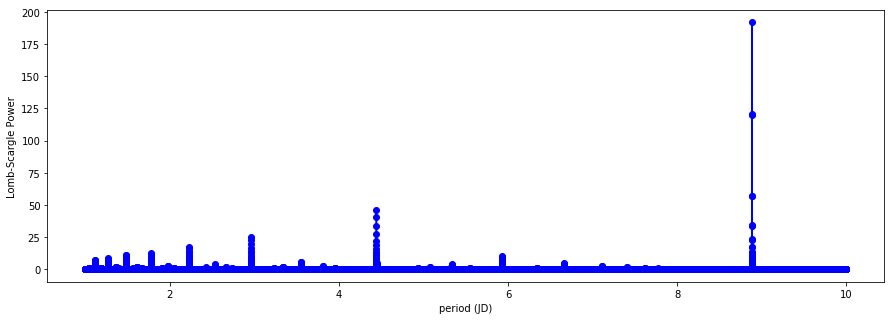

Max power Period:  8.884801622969807
Second Max power Period:  8.885119434100082
T0 time:  134.45230357746382
Duration time:  0.09325213681351682
Depth:  0.9886214124602452
Rp/Rs:  0.099892956720987
transit numbers:  164


In [39]:
periodogram = results["power"]

periods = results["periods"]
t0 = results["T0"]
dur = results["duration"]
depth = results["depth_mean"][0] #como se acostumbra
ratio = results["rp_rs"]
t_N = results["transit_count"]

plt.figure(figsize=(15,5))
plt.plot(periods, periodogram, 'bo-')
plt.xlabel('period (JD)')
plt.ylabel('Lomb-Scargle Power')
plt.show()

indx_max = periodogram.argsort()[::-1]
print("Max power Period: ",periods[indx_max[0]])
print("Second Max power Period: ",periods[indx_max[1]])

print("T0 time: ",t0)
print("Duration time: ",dur)
print("Depth: ",depth)
print("Rp/Rs: ",ratio)
print("transit numbers: ",t_N)

In [ ]:
##selected model
total_time = time.time()
iters_time = []

Y_hat_test = []
for i in range(N):
    print("va en el :", i+1)
    iter_time = time.time()
    meta_pred = []
    
    ### PERIOD ESTIMATE --LOMB-SCARGLE Method
    periodogram = lombscargle(X_time_test[i], X_lc_test[i], ang_freqs, normalize=False) #input has to be centered..

    indx_max = periodogram.argsort()[::-1]
    period_pred = periods[indx_max[0]] 
    meta_pred.append(period_pred)
    
    Y_hat_test.append(meta_pred) ##error only on period.. for now
    iters_time.append(time.time()-iter_time)

Y_hat_test = np.asarray(Y_hat_test)

print("Time on pred (period) test set-- (mins): ",(time.time()-total_time)/60)
print("Time per data pred (period)-- (mins): ",(np.mean(iters_time))/60)

np.save("LombScar_period_p2.npy", Y_hat_test)
Y_hat_test.shape

va en el : 1
va en el : 2
va en el : 3
va en el : 4
va en el : 5
va en el : 6
va en el : 7
va en el : 8
va en el : 9
va en el : 10
va en el : 11
va en el : 12
va en el : 13
va en el : 14
va en el : 15
va en el : 16
va en el : 17
va en el : 18
va en el : 19
va en el : 20
va en el : 21
va en el : 22
va en el : 23
va en el : 24
va en el : 25
va en el : 26
va en el : 27
va en el : 28
va en el : 29
va en el : 30
va en el : 31
va en el : 32
va en el : 33
va en el : 34
va en el : 35
va en el : 36
va en el : 37
va en el : 38
va en el : 39
va en el : 40
va en el : 41
va en el : 42
va en el : 43
va en el : 44
va en el : 45
va en el : 46
va en el : 47
va en el : 48
va en el : 49
va en el : 50
va en el : 51
va en el : 52
va en el : 53
va en el : 54
va en el : 55
va en el : 56
va en el : 57
va en el : 58
va en el : 59
va en el : 60
va en el : 61
va en el : 62
va en el : 63
va en el : 64
va en el : 65
va en el : 66
va en el : 67
va en el : 68
va en el : 69
va en el : 70
va en el : 71
va en el : 72
v

In [9]:
# requiere cuda: https://johnh2o2.github.io/cuvarbase/bls.html
import cuvarbase.bls as bls

# set up search parameters
search_params = dict(qmin=1e-2, #un 1 porciento
                     qmax=0.5, #la mitad

                     # The logarithmic spacing of q
                     dlogq=0.1,

                     # Number of overlapping phase bins
                     # to use for finding the best phi0
                     noverlap=3)

bls_power, sols = bls.eebls_gpu(X_time_test[i], X_lc_test[i], freqs=ang_freqs,
                                **search_params)

ImportError: No module named 'cuvarbase'

In [ ]:
# best BLS fit
q_best, phi0_best = sols[np.argmax(bls_power)]
f_best = freqs[np.argmax(bls_power)]

In [7]:
from numba import njit

@njit(parallel=True, cache=False, fastmath=True)
def lnlike_normal_v(o, m, e):
    m = atleast_2d(m)
    npv = m.shape[0]
    npt = o.size
    lnl = zeros(npv)
    for i in prange(npv):
        for j in range(npt):
            lnl[i] += -log(e[i]) - 0.5*log(2*pi) - 0.5*((o[j]-m[i,j])/e[i])**2
    return lnl

In [1]:
### si lo de abajo funciona reivsar bien cómo es lo que hace (entender baseline)
#https://github.com/hpparvi/PyTransit/blob/master/notebooks/01_broadband_parameter_estimation.ipynb
    
from pytransit import QuadraticModel
from pytransit.utils.de import DiffEvol
from pytransit.orbits.orbits_py import as_from_rhop,  i_from_ba
from pytransit.param.parameter import (ParameterSet, GParameter, PParameter, LParameter,
                                       NormalPrior as NP, 
                                       UniformPrior as UP)

class LPFunction:
    def __init__(self, name: str, times: ndarray = None, fluxes: ndarray = None):
        self.tm = QuadraticModel(klims=(0.05, 0.25), nk=512, nz=512)

        # LPF name
        # --------
        self.name = name
        
        # Declare high-level objects
        # --------------------------
        self.ps = None          # Parametrisation
        self.de = None          # Differential evolution optimiser
        self.sampler = None     # MCMC sampler

        # Initialize data
        # ---------------
        self.times = asarray(times)
        self.fluxes = asarray(fluxes)
        self.tm.set_data(self.times)

        # Define the parametrisation
        # --------------------------
        self.ps = ParameterSet([
            GParameter('tc',  'zero_epoch',       'd',      NP(0.0,  0.1), (-inf, inf)),
            GParameter('pr',  'period',           'd',      NP(1.0, 1e-5), (0,    inf)),
            GParameter('rho', 'stellar_density',  'g/cm^3', UP(0.1, 25.0), (0,    inf)),
            GParameter('b',   'impact_parameter', 'R_s',    UP(0.0,  1.0), (0,      1)),
            GParameter('k2', 'area_ratio', 'A_s', UP(0.05**2, 0.25**2), (0.05**2, 0.25**2)),
            GParameter('q1', 'q1_coefficient', '', UP(0, 1), bounds=(0, 1)),
            GParameter('q2', 'q2_coefficient', '', UP(0, 1), bounds=(0, 1)),
            GParameter('loge', 'log10_error', '', UP(-4, 0), bounds=(-4, 0))])
        self.ps.freeze()

    def create_pv_population(self, npop=50):
        return self.ps.sample_from_prior(npop)
        
    def baseline(self, pv):
        """Multiplicative baseline"""
        return 1.

    def transit_model(self, pv, copy=True):
        pv = atleast_2d(pv)
        
        # Map from sampling parametrisation to the transit model parametrisation
        # ----------------------------------------------------------------------
        pvt = zeros((pv.shape[0], 7))
        pvt[:,0]   = sqrt(pv[:,4])
        pvt[:,1:3] = pv[:,0:2]
        pvt[:,  3] = as_from_rhop(pv[:,2], pv[:,1])
        pvt[:,  4] = i_from_ba(pv[:,3], pvt[:,3])
        
        # Map the limb darkening
        # ----------------------
        ldc = zeros((pv.shape[0],2))
        a, b = sqrt(pv[:,5]), 2.*pv[:,6]
        ldc[:,0] = a * b
        ldc[:,1] = a * (1. - b)
            
        return self.tm.evaluate_pv(pvt, ldc)

    def flux_model(self, pv):
        return self.transit_model(pv) * self.baseline(pv)

    def residuals(self, pv):
        return self.fluxes - self.flux_model(pv)

    def set_prior(self, pid: int, prior) -> None:
            self.ps[pid].prior = prior

    def lnprior(self, pv):
        return self.ps.lnprior(pv)

    def lnlikelihood(self, pv):
        flux_m = self.flux_model(pv)
        wn = 10**(atleast_2d(pv)[:, 7])
        return lnlike_normal_v(self.fluxes, flux_m, wn)

    def lnposterior(self, pv):
        lnp = self.lnprior(pv) + self.lnlikelihood(pv)
        return where(isfinite(lnp), lnp, -inf)

    def __call__(self, pv):
        return self.lnposterior(pv)

    def optimize(self, niter=200, npop=50, population=None, label='Global optimisation', leave=False):
        if self.de is None:
            self.de = DiffEvol(self.lnposterior, clip(self.ps.bounds, -1, 1), npop, maximize=True, vectorize=True)
            if population is None:
                self.de._population[:, :] = self.create_pv_population(npop)
            else:
                self.de._population[:,:] = population
        for _ in tqdm(self.de(niter), total=niter, desc=label, leave=leave):
            pass

    def sample(self, niter=500, thin=5, label='MCMC sampling', reset=True, leave=True):
        if self.sampler is None:
            self.sampler = EnsembleSampler(self.de.n_pop, self.de.n_par, self.lnposterior, vectorize=True)
            pop0 = self.de.population
        else:
            pop0 = self.sampler.chain[:,-1,:].copy()
        if reset:
            self.sampler.reset()
        for _ in tqdm(self.sampler.sample(pop0, iterations=niter, thin=thin), total=niter, desc=label, leave=False):
            pass

    def posterior_samples(self, burn: int=0, thin: int=1):
        fc = self.sampler.chain[:, burn::thin, :].reshape([-1, self.de.n_par])
        return pd.DataFrame(fc, columns=self.ps.names)

    def plot_mcmc_chains(self, pid: int=0, alpha: float=0.1, thin: int=1, ax=None):
        fig, ax = (None, ax) if ax is not None else subplots()
        ax.plot(self.sampler.chain[:, ::thin, pid].T, 'k', alpha=alpha)
        fig.tight_layout()
        return fig

    def plot_light_curve(self, model: str = 'de', figsize: tuple = (13, 4)):
        fig, ax = subplots(figsize=figsize, constrained_layout=True)
        cp = sb.color_palette()

        if model == 'de':
            pv = self.de.minimum_location
            err = 10**pv[7]
        elif model == 'mc':
            fc = array(self.posterior_samples())
            pv = permutation(fc)[:300]
            err = 10**median(pv[:, 7], 0)

        ax.errorbar(self.times, self.fluxes, err, fmt='.', c=cp[4], alpha=0.75)

        if model == 'de':
            ax.plot(self.times, self.flux_model(pv), c=cp[0])
        if model == 'mc':
            flux_pr = self.flux_model(fc[permutation(fc.shape[0])[:1000]])
            flux_pc = array(percentile(flux_pr, [50, 0.15,99.85, 2.5,97.5, 16,84], 0))
            [ax.fill_between(self.times, *flux_pc[i:i+2,:], alpha=0.2,facecolor=cp[0]) for i in range(1,6,2)]
            ax.plot(self.times, flux_pc[0], c=cp[0])
        setp(ax, xlim=self.times[[0,-1]], xlabel='Time', ylabel='Normalised flux')
        return fig, axs

ImportError: No module named 'pytransit'

In [ ]:
chains = []
npop, de_iter, mc_iter, mc_burn, thin = 100, 200, 1500, 1000, 10

for i in range(N):
    lpf = LPFunction(X_time_test[i], X_lc_test[i])
    lpf.optimize(de_iter, npop)
    lpf.sample(mc_burn, thin=thin)
    lpf.sample(mc_iter, thin=thin, reset=True)
    chains.append(lpf.sampler.chain.reshape([-1,lpf.sampler.chain.shape[-1]]))
chains = array(chains)


### Reading files and Evaluate

In [5]:
!ls BASELINE

ls_baseline_0.01.txt  ls_baseline_A.txt
ls_baseline_0.1.txt   tls_baseline_0.1.txt


In [97]:
aux = np.load("BASELINE/LombScar_period_p1.npy")
evaluate_metadata_raw(Y_test[:,[0]], aux, plot=True, metadata_used=["Period"]) #1e-1

array([[8.91000e+00],
       [5.10000e-01],
       [1.48100e+01],
       [1.59100e+01],
       [1.85100e+01],
       [1.27841e+03],
       [1.51000e+00],
       [1.33100e+01],
       [1.00000e-02],
       [4.10000e-01],
       [1.00000e-02],
       [1.00000e-02],
       [7.10000e-01],
       [5.10000e-01],
       [2.81100e+01],
       [6.11000e+00],
       [6.61000e+00],
       [1.00000e-02],
       [3.10000e-01],
       [1.00000e-02],
       [2.21000e+00],
       [2.10000e-01],
       [2.10000e-01],
       [1.10000e-01],
       [7.10000e-01],
       [1.39100e+01],
       [1.00000e-02],
       [1.00000e-02],
       [9.64810e+02],
       [9.10000e-01],
       [2.10000e-01],
       [3.10000e-01],
       [1.00000e-02],
       [3.10000e-01],
       [1.50100e+01],
       [4.10000e-01],
       [5.10000e-01],
       [5.10000e-01],
       [1.00000e-02],
       [3.10000e-01],
       [5.34100e+01],
       [6.10000e-01],
       [1.11000e+00],
       [1.11000e+00],
       [6.10000e-01],
       [3.

In [8]:
file_name = "./BASELINE/ls_baseline_0.1.txt"

df_period = pd.read_csv(file_name)

Y_hat_test = (df_period["Period"].values).reshape(-1,1)
print("Method LS with pre %s it takes %f mins per LC"%(file_name.split("_")[-1].split(".txt")[0],df_period["Time (sec)"].mean()/60))
display(df_period.head())

evaluate_metadata_raw(Y_test[:,[0]], Y_hat_test, plot=True, metadata_used=["Period"]) #1e-1

Method LS with pre 0.1 it takes 1.337894 mins per LC


,KOI Name,Period,Time (sec)
0,K00889.01,8.91,87.598832
1,K01002.01,1999.91,87.399519
2,K02534.01,1999.91,87.426564
3,K00440.01,15.91,87.460250
4,K01022.01,18.51,85.995668


,Period,Global
MAE,6.083288e+02,6.083288e+02
MApE,1.354296e+04,1.354296e+04
MSE,1.128811e+06,1.128811e+06
MeAE,2.761244e+01,2.761244e+01
RMSLE,3.471667e+00,3.471667e+00


{'MAE': [608.3287656827781, 608.3287656827781],
 'MApE': [13542.962105148956, 13542.962105148956],
 'MSE': [1128811.0845863698, 1128811.0845863698],
 'MeAE': [27.6124393, 27.6124393],
 'RMSLE': [3.4716665027595024, 3.4716665027595024]}

In [21]:
file_name = "./BASELINE/ls_baseline_0.01.txt"

df_period = pd.read_csv(file_name)

Y_hat_test = (df_period["Period"].values).reshape(-1,1)
print("Method LS with pre %s it takes %f mins per LC"%(file_name.split("_")[-1].split(".txt")[0],df_period["Time (sec)"].mean()/60))
display(df_period.head())

evaluate_metadata_raw(Y_test[:,[0]], Y_hat_test, plot=True, metadata_used=["Period"]) #1e-1

Method LS with pre 0.01 it takes 13.374541 mins per LC


,KOI Name,Period,Time (sec)
0,K00889.01,8.89,873.486935
1,K01002.01,1999.99,872.721349
2,K02534.01,0.46,872.955369
3,K00440.01,7.95,872.969454
4,K01022.01,0.38,858.544355


,Period,Global
MAE,168.878250,168.878250
MApE,4192.037373,4192.037373
MSE,289496.275205,289496.275205
MeAE,11.727517,11.727517
RMSLE,2.705891,2.705891


{'MAE': [168.87825030354256, 168.87825030354256],
 'MApE': [4192.0373731846485, 4192.0373731846485],
 'MSE': [289496.2752048744, 289496.2752048744],
 'MeAE': [11.72751692, 11.72751692],
 'RMSLE': [2.7058906445413604, 2.7058906445413604]}

In [41]:
file_name = "./BASELINE/ls_baseline_A.txt"

df_period = pd.read_csv(file_name)

Y_hat_test = (df_period["Period"].values).reshape(-1,1)
print("Method LS with pre %s it takes %f mins per LC"%(file_name.split("_")[-1].split(".txt")[0],df_period["Time (sec)"].mean()/60))
display(df_period.head())

evaluate_metadata_raw(Y_test[:,[0]], Y_hat_test, plot=True, metadata_used=["Period"]) #1e-1

Method LS with pre A it takes 0.020782 mins per LC


,KOI Name,Period,Time (sec)
0,K00889.01,0.010372,1.480684
1,K01002.01,0.010557,1.255705
2,K02534.01,0.010574,1.253505
3,K00440.01,0.010519,1.251319
4,K01022.01,0.010005,1.217894


,Period,Global
MAE,25.853742,25.853742
MApE,99.824418,99.824418
MSE,2564.118683,2564.118683
MeAE,11.021266,11.021266
RMSLE,2.817740,2.817740


{'MAE': [25.853742228351237, 25.853742228351237],
 'MApE': [99.82441754723216, 99.82441754723216],
 'MSE': [2564.118682829466, 2564.118682829466],
 'MeAE': [11.021265764567914, 11.021265764567914],
 'RMSLE': [2.8177395149282165, 2.8177395149282165]}

In [44]:
file_name = "./BASELINE/tls_baseline_0.1.txt"

df_period = pd.read_csv(file_name)
df_period = impute_on_pandas(df_period)#porque hay nan??

meta_calc = ["Period","Duration","Time of Transit Epoch", "r/R", "Transit Number" ]
Y_hat_test = df_period[meta_calc].values
Y_test_tls = df_meta_obj[meta_calc].values[mask_test_conf]
print("Method T-LS it takes %f mins per LC"%(df_period["Time (sec)"].mean()/60))
display(df_period.head())

evaluate_metadata_raw(Y_test_tls, Y_hat_test, plot=True, metadata_used=meta_calc) #1e-1

Method T-LS it takes 15.458290 mins per LC


,KOI Name,Period,Duration,Depth,Time of Transit Epoch,r/R,Transit Number,Time (sec)
0,K00889.01,8.884802,0.077009,0.986837,134.452150,0.108711,164.0,1239.687207
1,K01002.01,3.481520,0.064565,0.999897,132.993641,0.009612,419.0,1105.680208
2,K02534.01,3.025585,0.099456,0.999915,134.356671,0.008813,482.0,1519.662616
3,K00440.01,15.906629,0.152602,0.999327,146.117555,0.024672,91.0,1137.279084
4,K01022.01,18.827374,0.164878,0.999402,177.355668,0.023415,76.0,1461.543025


,Period,Duration,Time of Transit Epoch,r/R,Transit Number,Global
MAE,10.487241,0.058370,31.925782,0.007056,56.798020,19.855294
MApE,62.381138,27.038681,20.774353,23.849253,103.483343,47.505354
MSE,2702.064447,0.010457,9374.875429,0.000413,23720.009901,7159.392129
MeAE,0.000157,0.032247,0.022043,0.003864,20.000000,4.011662
RMSLE,0.657793,0.081522,0.460199,0.017871,0.697807,0.383038


{'MAE': [10.487241067437648,
  0.058370201682191904,
  31.92578178890104,
  0.007055601597098596,
  56.798019801980196,
  19.855293692319634],
 'MApE': [62.38113797382425,
  27.038680619017956,
  20.774353476356254,
  23.849252814020737,
  103.48334279225413,
  47.50535353509466],
 'MSE': [2702.0644473237453,
  0.010456564400744814,
  9374.875428988496,
  0.00041280514016505,
  23720.0099009901,
  7159.3921293343765],
 'MeAE': [0.0001572352208043526,
  0.032246735619857025,
  0.0220430540936718,
  0.003864156372702897,
  20.0,
  4.011662236261407],
 'RMSLE': [0.6577932657634966,
  0.081521566286352,
  0.46019855038970114,
  0.017871498959953824,
  0.6978073106421759,
  0.38303843840833596]}

In [43]:
from IPython.display import display, HTML
from evaluation import evaluate_metadata, evaluate_metadata_raw

def plot_n_meta(real, pred, n= 10, plot_real = True, meta_us = ["Period"]):
    if plot_real:
        pred = scaler_meta.inverse_transform(pred)
    for _ in range(n):
        n_sampled = np.random.randint(0,real.shape[0])
        aux = pd.DataFrame()
        aux["Real"] = real[n_sampled]
        aux["Predicted"] = pred[n_sampled]
        aux.index=meta_us
        display(aux.transpose())
        print("----------------------------------------------------------------")

In [42]:
print("LS auto")
plot_n_meta(Y_test[:,[0]], Y_hat_test, plot_real=False)

LS auto


,Period
Real,17.146488
Predicted,0.010428


----------------------------------------------------------------


,Period
Real,6.040462
Predicted,0.010502


----------------------------------------------------------------


,Period
Real,2.940305
Predicted,0.010509


----------------------------------------------------------------


,Period
Real,27.478466
Predicted,0.010499


----------------------------------------------------------------


,Period
Real,6.040462
Predicted,0.010502


----------------------------------------------------------------


,Period
Real,160.884520
Predicted,0.010071


----------------------------------------------------------------


,Period
Real,8.990886
Predicted,0.010012


----------------------------------------------------------------


,Period
Real,5.660669
Predicted,0.010000


----------------------------------------------------------------


,Period
Real,7.238582
Predicted,0.010513


----------------------------------------------------------------


,Period
Real,2.886762
Predicted,0.010476


----------------------------------------------------------------


In [46]:
print("TLS auto")
plot_n_meta(Y_test_tls, Y_hat_test, plot_real=False, meta_us=meta_calc)

TLS auto


,Period,Duration,Time of Transit Epoch,r/R,Transit Number
Real,12.466004,0.208608,134.003258,0.043000,109.0
Predicted,12.465949,0.191196,133.996858,0.039725,117.0


----------------------------------------------------------------


,Period,Duration,Time of Transit Epoch,r/R,Transit Number
Real,8.884923,0.086252,169.991686,0.114000,153.0
Predicted,8.884802,0.077009,134.452150,0.108711,164.0


----------------------------------------------------------------


,Period,Duration,Time of Transit Epoch,r/R,Transit Number
Real,70.698172,0.276333,188.567950,0.017000,18.0
Predicted,70.696700,0.243263,188.572637,0.012451,20.0


----------------------------------------------------------------


,Period,Duration,Time of Transit Epoch,r/R,Transit Number
Real,4.603575,0.097912,171.840124,0.019000,291.0
Predicted,4.603561,0.085334,135.001639,0.017449,317.0


----------------------------------------------------------------


,Period,Duration,Time of Transit Epoch,r/R,Transit Number
Real,33.240798,0.194792,143.46683,0.017000,38.0
Predicted,33.241280,0.147254,143.45369,0.013817,44.0


----------------------------------------------------------------


,Period,Duration,Time of Transit Epoch,r/R,Transit Number
Real,0.971916,0.066763,132.165040,0.008000,1376.0
Predicted,0.971902,0.056579,132.165965,0.007298,1501.0


----------------------------------------------------------------


,Period,Duration,Time of Transit Epoch,r/R,Transit Number
Real,35.617602,0.352329,197.035730,0.061000,34.0
Predicted,35.616822,0.258772,197.026392,0.029758,40.0


----------------------------------------------------------------


,Period,Duration,Time of Transit Epoch,r/R,Transit Number
Real,7.106957,0.214425,138.322710,0.010000,170.0
Predicted,7.106967,0.138733,138.316446,0.007504,205.0


----------------------------------------------------------------


,Period,Duration,Time of Transit Epoch,r/R,Transit Number
Real,184.772710,0.398667,217.357300,0.028000,8.0
Predicted,14.236962,0.102332,140.477448,0.011772,102.0


----------------------------------------------------------------


,Period,Duration,Time of Transit Epoch,r/R,Transit Number
Real,81.315305,0.241958,175.995700,0.024000,15.0
Predicted,81.311676,0.184696,176.008546,0.018468,18.0


----------------------------------------------------------------
